<h1> Using SVR on Landslide Susceptibility Mapping using GIS and Map Data </h1>

In [1]:
import numpy as np
import pandas as pd
import json
from sklearn import preprocessing

In [2]:
import utm

def getLatLonCoordsByPoint(point):
    xy = point.split('/')
    return getLatLonCoords(float(xy[0]), float(xy[1]))

def getLatLonCoords(x, y):
    return utm.to_latlon(x, y, 51, 'N')

<h2>Import Land Features CSVs</h2>

In [3]:
sample = pd.read_csv("Features - Elev - Slope - QSlope - Aspect - TRI.csv")

In [4]:
land_cover = pd.read_csv("FE with Land Cover.csv")

In [5]:
land_use = pd.read_csv("FE with Land Use.csv")

c:\users\ramon\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# land_type = pd.read_csv("FE with Geology.csv")

In [7]:
soil_type = pd.read_csv("FE with Phil Soil Type.csv")

c:\users\ramon\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
distance_from_water_ways = pd.read_csv("Distance from Water Ways.csv")

In [9]:
distance_from_faults = pd.read_csv("Distance from Fault.csv")

In [10]:
earthquake_ls = pd.read_csv("FE Earthquake induced landslide.csv")

c:\users\ramon\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
rain_liq_ls = pd.read_csv("Liquefaction and Rain Induced.csv")

In [12]:
ndvi = pd.read_csv("FE NDVI.csv")

<h2>Import Landslide Data</h2>

In [13]:
landslides = pd.read_csv("FE Landslides.csv")
landslides = landslides.fillna(0)
landslides.rename(columns = {'value':'LS_VALUE'}, inplace = True)
landslides['POINT'] = landslides['lon'].map(str) + '/' + landslides['lat'].map(str)

In [14]:
landslides = landslides.drop(columns=['lon', 'lat'])

In [15]:
landslides.groupby('LS_VALUE').count()
# landslides

,POINT
LS_VALUE,
0.0,435298
1.0,5804


<h2>Import Rainfall Data</h2>

In [16]:
#DAILY (RAINFALL, REL HUMIDITY, MIN-MAX TEMP)

infanta_rht = pd.read_csv("..\PAGASA\\102019067\\Infanta.csv")
infanta_rht = infanta_rht.rolling(7).mean()
infanta_rht = infanta_rht.iloc[::7, :]
infanta_rainfall = infanta_rht['RAINFALL']

tayabas_rht = pd.read_csv("..\PAGASA\\102019067\\Tayabas.csv")
tayabas_rht = tayabas_rht.rolling(7).mean()
tayabas_rht = tayabas_rht.iloc[::7, :]
tayabas_rainfall = tayabas_rht['RAINFALL']

ambulong_rht = pd.read_csv("..\PAGASA\\102019067\\Ambulong.csv")
ambulong_rht = ambulong_rht.rolling(7).mean()
ambulong_rht = ambulong_rht.iloc[::7, :]
ambulong_rainfall = ambulong_rht['RAINFALL']

naia_rht = pd.read_csv("..\PAGASA\\102019067\\NAIA.csv")
naia_rht = naia_rht.rolling(7).mean()
naia_rht = naia_rht.iloc[::7, :]
naia_rainfall = naia_rht['RAINFALL']

agromet_rht = pd.read_csv("..\PAGASA\\102019067\\Agromet.csv")
agromet_rht = agromet_rht.rolling(7).mean()
agromet_rht = agromet_rht.iloc[::7, :]
agromet_rainfall = agromet_rht['RAINFALL']


type(agromet_rainfall)
df = pd.Series.to_frame(agromet_rainfall)
df['INFANTA'] = infanta_rainfall
df['TAYABAS'] = tayabas_rainfall
df['AMBULONG'] = ambulong_rainfall
df['NAIA'] = naia_rainfall
df['AGROMET'] = agromet_rainfall

df = df.drop(columns=['RAINFALL']).dropna()

df['AVE_RAINFALL'] = df.mean(axis=1)

In [17]:
# 2015 Thu
# 2016 Fri
# 2017 Sun
# 2018 Mon
# 2019 Tue

naia_annual = pd.read_csv("..\PAGASA\\102019067\\NAIA.csv")
# print(naia_annual['RAINFALL'].min())
# naia_annual = naia_annual.rolling(30).mean()
# naia_annual = naia_annual.iloc[::30, :]
# naia_annual_rain = naia_annual['RAINFALL']
# naia_annual_rain.dropna()
naia_annual

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,RH,WIND_SPEED,WIND_DIRECTION
0,2015,1,1,12.2,26.3,21.6,87,1,280
1,2015,1,2,0.0,29.6,22.0,72,4,90
2,2015,1,3,0.0,29.8,22.2,73,3,120
3,2015,1,4,0.0,29.5,22.7,79,2,120
4,2015,1,5,0.0,30.2,20.1,78,3,110
5,2015,1,6,0.0,30.2,22.8,74,3,130
6,2015,1,7,0.0,29.3,23.0,71,2,110
7,2015,1,8,-1.0,30.6,23.0,62,4,80
8,2015,1,9,-1.0,29.2,21.3,72,3,110
9,2015,1,10,0.0,29.3,20.8,65,3,110


In [18]:
# infanta_rht.sort_values(by=['RAINFALL'], ascending=False)

In [19]:
df.dropna()

,INFANTA,TAYABAS,AMBULONG,NAIA,AGROMET,AVE_RAINFALL
7,3.928571e+00,6.414286,2.285714e-01,-0.142857,-1.428571e-01,2.057143
14,7.642857e+00,1.414286,1.903239e-16,-0.142857,-2.857143e-02,1.777143
21,1.037143e+01,7.514286,1.542857e+00,1.500000,2.428571e+00,4.671429
28,2.328571e+00,-0.142857,2.537653e-16,0.000000,0.000000e+00,0.437143
35,3.142857e-01,0.428571,5.714286e-02,0.000000,0.000000e+00,0.160000
42,7.228571e+00,-0.214286,-5.714286e-02,-0.285714,1.285714e-01,1.360000
49,1.568571e+01,8.528571,4.285714e-01,-0.071429,-7.142857e-02,4.900000
56,7.428571e-01,0.214286,-2.857143e-01,0.000000,0.000000e+00,0.134286
63,1.742857e+00,-0.071429,1.903239e-16,-0.142857,0.000000e+00,0.305714
70,5.971429e+00,0.571429,4.000000e-01,0.142857,7.857143e-01,1.574286


In [20]:
#USGS Elevation Fetcher 
# def make_remote_request(url: str, params: dict) -> json:
#     count = 1
#     while True:
#         try:
#             response = requests.get((url + urllib.parse.urlencode(params)))
#         except (OSError, urllib3.exceptions.ProtocolError) as error:
#             print('\n')
#             print('*' * 20, 'Error Occured', '*' * 20)
#             print(f'Number of tries: {count}')
#             print(f'URL: {url}')
#             print(error)
#             print('\n')
#             count += 1
#             continue
#         break

#     return response


# def elevation_function(x):
#     url = 'https://nationalmap.gov/epqs/pqs.php?'
#     params = {'x': x[1],
#               'y': x[0],
#               'units': 'Meters',
#               'output': 'json'}
#     result = make_remote_request(url, params)
#     return result.json()['USGS_Elevation_Point_Query_Service']['Elevation_Query']['Elevation']

# import requests
# import urllib
# import urllib3
#import rasterio as raster
#sample_points['elevations'] = sample_points.apply(elevation_function, axis=1)

In [21]:
# ASPECT SCALED VALUES

# arr = ["N", "NNW", "NW", "WNW", "W", "WSW", "SW", "SSW", "S", "SSE", "SE", "ESE", "E", "ENE", "NE", "NNE"]
arr = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE", "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
dirVals16 = {"N":0}
for v in range(15):
    dirVals16[arr[v+1]] = 0.0225*(v+1)
    
dirVals8 = {"E":0.0, "NE":0.045,"N":0.09,"NW":0.135,"W":0.18,"SW":0.225, "S":0.27, "SE":0.315}
# dirVals16 = {"E":0.0,"ENE":0.0225,"NE":0.045,"NNE":0.0675,"N":0.09,"NNW"0.1125,"NW":0.135,"WNW":0.1575,"W":0.18,"WSW":0.2025,"SW":0.225,"SSW":0.2475,"S":0.27,"SSE":0.2925,"SE":0.315,"ESE":0.3375}

In [22]:
dirVals16

{'N': 0,
 'NNE': 0.0225,
 'NE': 0.045,
 'ENE': 0.0675,
 'E': 0.09,
 'ESE': 0.11249999999999999,
 'SE': 0.135,
 'SSE': 0.1575,
 'S': 0.18,
 'SSW': 0.20249999999999999,
 'SW': 0.22499999999999998,
 'WSW': 0.2475,
 'W': 0.27,
 'WNW': 0.2925,
 'NW': 0.315,
 'NNW': 0.33749999999999997}

In [23]:
# SLOPE SCALED VALUES
slope = {"A":0.08,"B":.18,"C":.3,"D":0.5,"E":1,"IW":0}

<h2>Utility Functions</h2>

In [24]:
def degToCompass16(num):
    val = int((num/22.5)+.5)
    arr = ["E", "ENE", "NE", "NNE", "N", "NNW", "NW", "WNW", "W", "WSW", "SW", "SSW", "S", "SSE", "SE", "ESE"]
    return arr[(val % 16)]

def degToCompass8(num):
    val = int((num/22.5)+.5)
    arr = ["E","NE","N","NW","W","SW", "S", "SE"]
    return arr[(val % 8)]   

def dir8ToVal(dir):
    return dirVals8[dir]

def dir16ToVal(dir):
    return dirVals16[dir]

def getSlopeVal(desc):
    return slope[desc]

def getElevClass(elev):
    return int(elev / 106) / 20

def normalizeTri(tri):
    return tri + 30.625

def getTriClass(tri):
    return int(normalizeTri(tri) / 2.7 ) / 20

In [25]:
dir8ToVal("NE")

0.045

In [26]:
dir16ToVal("SE")

0.135

In [27]:
23.875 + 30.625

print (getTriClass(23.875))
print (getTriClass(12.32))
print (getTriClass(13.32))
print (getTriClass(14.32))
print (getTriClass(2.2))
print (getTriClass(3.2))
print (getTriClass(22.32))
print (getTriClass(-30.625))

1.0
0.75
0.8
0.8
0.6
0.6
0.95
0.0


In [28]:
getElevClass(106)


0.05

In [29]:
for x in range(16):
    print (x*.0225)

0.0
0.0225
0.045
0.0675
0.09
0.11249999999999999
0.135
0.1575
0.18
0.20249999999999999
0.22499999999999998
0.2475
0.27
0.2925
0.315
0.33749999999999997


In [30]:
import math 

In [31]:
#Utility functions - LU LC

#Land Cover classes: 1 - Highly Covered - 1, Moderately Covered - .7, Lightly Covered - .3, No Cover - 0.1,  Water - -1
covers = {"Fishpond":-1, "Inland Water":-1, "Open/Barren": 0.1, "Brush/Shrubs":0.3, "Grassland":0.7, "Annual Crop":0.3, "Built-up":0.7, "Perennial Crop":0.7, "Open Forest":1, "Closed Forest":1 }  

#Land Use Impact - High Impact - 1, Moderate Impact - .75, Low Impact - 0.5, Very Low Impact - 0.25, No Impact- 0.1
land_use_impact = {"unused":0.1, "residential":.75, 
       "cemetery":.5, 
       "park":0.5, 
       "industrial":0.75, 
       "forest":0.1, 
       "retail":0.25, 
       "farm":0.5, 
       "commercial":0.5, 
       "grass":0.1, 
       "military":0.5, 
       "orchard":0.25, 
       "meadow":0.25, 
       "scrub":0.25, 
       "quarry":1, 
       "recreation_ground":0.5, 
       "nature_reserve":0.1}


def getCoverVal(cover):
    if cover is np.nan:
        return 0
    return covers[cover]

def scaleCoverSize(size):
    if math.isnan(size):
        return 0
    return int(size / 903) / 100

def transformLandUse(use):
    if pd.isnull(use):
        return 0
    if use is np.nan:
        return 0
    return land_use_impact[use]

def transformSoilType(soil):
    return 0

def transformGeologyType(geo):
    return 0


In [32]:
scaleCoverSize(7313)

0.08

In [33]:
# sample_point_export = sample_points.to_csv(r'D:\COMPLETE THIS!!\Data Acquired\CSVs\point_sample.csv',index = None, header=True)

In [34]:
# coords = [tuple(x) for x in sample_points.values] #coords is the tuple of lon and lat

In [35]:
sample['POINT'] = sample['lon'].map(str) + '/' + sample['lat'].map(str)

In [36]:
land_cover['POINT'] = land_cover['lon'].map(str) + '/' + land_cover['lat'].map(str)

In [37]:
land_use['POINT'] = land_use['lon'].map(str) + '/' + land_use['lat'].map(str)

In [38]:
soil_type['POINT'] = soil_type['lon'].map(str) + '/' + soil_type['lat'].map(str)

In [39]:
earthquake_ls['POINT'] = earthquake_ls['lon'].map(str) + '/' + earthquake_ls['lat'].map(str)

In [40]:
rain_liq_ls['POINT'] = rain_liq_ls['lon'].map(str) + '/' + rain_liq_ls['lat'].map(str)

In [41]:
285417.4602417005, 1544775.6368829422
348873.4731547999, 1610781.94250232

(348873.4731547999, 1610781.94250232)

In [42]:
# land_type['POINT'] = land_type['lon'].map(str) + '/' + land_type['lat'].map(str)

In [43]:
ndvi['POINT'] = ndvi['lon'].map(str) + '/' + ndvi['lat'].map(str)

<h2>Transformation and Standardization of NDVI</h2>

In [44]:
ndvi = ndvi.drop(columns=["lon", "lat"])

In [45]:
ndvi.rename(columns = {'NDVI proje':'NDVI'}, inplace = True)

In [46]:
ndvi.min(axis=0)['NDVI']

-0.58

In [47]:
#Preprocess NDVI
ndvi = ndvi.dropna()
def getNdviClass(ndvi):
    if ndvi < 0:
        return 0
    if ndvi >= 0 and ndvi <= 0.1:
        return 0.1
    if ndvi > 0.1 and ndvi <= 0.4:
        return 0.4
    if ndvi > 0.4:
        return 1

#Standardize NDVI
ndvi['NDVI'] = ndvi['NDVI'].apply(getNdviClass)



In [48]:
ndvi.min(axis=0)['NDVI']

0.0

In [49]:
ndvi.max(axis=0)['NDVI']

1.0

In [50]:
ndvi

,NDVI,POINT
0,1.0,312775.2104342669/1544806.8868831748
1,1.0,312775.2104342669/1544806.8868831748
2,1.0,312617.710434453/1544811.8868829866
3,0.4,312590.21043448924/1544816.8868829524
4,0.4,312885.2104341786/1544836.886883291
5,0.4,312905.21043417236/1544851.8868833103
6,0.4,313063.5927869136/1544833.504530564
7,1.0,313321.3906080289/1544880.2092246881
9,1.0,313424.9961392994/1544902.7757816478
10,0.0,312430.2104348074/1544926.8868827284


<h2>Transformation and Standardization of Distance from Waterways</h2>

In [51]:
distance_from_water_ways = pd.read_csv("Distance from Water Ways.csv")
distance_from_water_ways['POINT'] = distance_from_water_ways['lon'].map(str) + '/' + distance_from_water_ways['lat'].map(str)

In [52]:
distance_from_water_ways = distance_from_water_ways.drop(columns=["join_osm_id", "join_code", "join_fclass", "join_width","join_name", "lon", "lat"])

In [53]:
distance_from_water_ways.rename(columns = {'distance':'WATER_DISTANCE'}, inplace = True)
distance_from_water_ways = distance_from_water_ways.round(4)

In [54]:
max_w = distance_from_water_ways['WATER_DISTANCE'].max()
min_w = distance_from_water_ways['WATER_DISTANCE'].min()
print(max_w)
print(min_w)

0.0606
0.0


In [55]:
# print(distance_from_water_ways)
min_w_a = abs(distance_from_water_ways['WATER_DISTANCE'].min())

def normalizeWw(value):
    return value + min_w_a

distance_from_water_ways["WATER_DISTANCE"] = distance_from_water_ways["WATER_DISTANCE"].apply(normalizeWw)

max_w = distance_from_water_ways['WATER_DISTANCE'].max()
min_w = distance_from_water_ways['WATER_DISTANCE'].min()

wv_distance = max_w - min_w
wv_classes = 5
classifier = wv_distance/(wv_classes-1) #classes -1 to account for 0 class

In [56]:
def classifyWw(value):
    nval = int(value / classifier)
    return nval * classifier

In [57]:
distance_from_water_ways["WATER_DISTANCE"] = distance_from_water_ways["WATER_DISTANCE"].apply(classifyWw).round(4)

In [58]:
distance_from_water_ways['WATER_DISTANCE'].unique()

array([0.    , 0.0152, 0.0303, 0.0455, 0.0606])

<h2>Transformation and Standardization of Distance from Faults</h2>

In [59]:
distance_from_faults = pd.read_csv("Distance from Fault.csv")

In [60]:
distance_from_faults['POINT'] = distance_from_faults['lon'].map(str) + '/' + distance_from_faults['lat'].map(str)
distance_from_faults = distance_from_faults.drop(columns=["lon", "lat"])
distance_from_faults = distance_from_faults[['POINT','distance']]
distance_from_faults.rename(columns = {'distance':'FAULT_DISTANCE'}, inplace = True)
distance_from_faults = distance_from_faults.round(4)

In [61]:
min_f_a = abs(distance_from_faults['FAULT_DISTANCE'].min())
print(min_f_a)

max_f_a = distance_from_faults['FAULT_DISTANCE'].max()
print(max_f_a)

print(max_f_a - min_f_a)
print((max_f_a - min_f_a)/4)

0.0
0.3401
0.3401
0.085025


In [62]:
min_f_a = abs(distance_from_faults['FAULT_DISTANCE'].min())

def normalizeF(value):
    return value + min_f_a

distance_from_faults["FAULT_DISTANCE"] = distance_from_faults["FAULT_DISTANCE"].apply(normalizeF)

max_f = distance_from_faults['FAULT_DISTANCE'].max()
min_f = distance_from_faults['FAULT_DISTANCE'].min()

fv_distance = max_f - min_f
fv_classes = 5
classifier = fv_distance/(fv_classes-1) #classes -1 to account for 0 class

In [63]:
def classifyF(value):
    nval = int(value / classifier)
    return nval * classifier

In [64]:
distance_from_faults["FAULT_DISTANCE"] = distance_from_faults["FAULT_DISTANCE"].apply(classifyF).round(4)

In [65]:
distance_from_faults['FAULT_DISTANCE'].unique()

array([0.2551, 0.17  , 0.085 , 0.    , 0.3401])

In [66]:
distance = pd.merge(distance_from_faults, distance_from_water_ways, on='POINT', how='left')

In [67]:
distance

,POINT,FAULT_DISTANCE,WATER_DISTANCE
0,312775.2104342669/1544806.8868831748,0.2551,0.0000
1,312775.2104342669/1544806.8868831748,0.2551,0.0000
2,312775.2104342669/1544806.8868831748,0.2551,0.0000
3,312775.2104342669/1544806.8868831748,0.2551,0.0000
4,312617.710434453/1544811.8868829866,0.2551,0.0000
5,312590.21043448924/1544816.8868829524,0.2551,0.0000
6,312885.2104341786/1544836.886883291,0.2551,0.0000
7,312905.21043417236/1544851.8868833103,0.2551,0.0000
8,313063.5927869136/1544833.504530564,0.2551,0.0000
9,313321.3906080289/1544880.2092246881,0.2551,0.0000


In [68]:
# sample['POINT']
# item = sample[0:1]
# print(item['POINT'])
# item = land_cover[0:1]
# print(item['POINT'])

In [69]:
# print(sample)

<h2>Transformation and Standardization of Land Cover</h2>

In [70]:
land_cover = land_cover.sort_values(by="ELEVATION_")

In [71]:
land_cover = land_cover.drop(columns=["SLOPE_CODE", "SLOPE_DESC", "ELEVATION_", "ASPECT_1","PROVINCE", "REGION", "lon", "lat"])

In [72]:
land_cover.fillna(0)

,AGG12,HECTARE,POINT
7232,Annual Crop,1420.403039,347545.21043718647/1580276.8869116206
95695,Built-up,96.943078,294555.2104897396/1573631.8868511345
99234,Built-up,51.710617,348685.2104335837/1578381.8869137
163575,Built-up,3978.567453,302985.2104736059/1568241.8868632258
58548,Annual Crop,1852.088807,346845.2104316448/1575034.3869127638
58549,Annual Crop,1852.088807,346840.2104316634/1575044.3869127538
58550,Annual Crop,1852.088807,347732.9882083877/1575019.9980249398
438684,0,0.000000,299825.2105226405/1605586.886843943
438683,0,0.000000,294090.2105291255/1605534.3868370731
439372,0,0.000000,292319.8680652723/1605435.8594377285


In [73]:
#transform and scale land cover
#scale slope feature
land_cover["COVER_TYPE"] = land_cover["AGG12"].apply(getCoverVal)

In [74]:
land_cover["HECTARE"] = pd.to_numeric(land_cover["HECTARE"], errors='coerce')

In [75]:
land_cover["COVER_SIZE"] = land_cover["HECTARE"].apply(scaleCoverSize)

In [76]:
land_cover = land_cover.drop(columns=["AGG12", "HECTARE"])

In [77]:
# land_cover = land_cover.fillna("Uncovered")
# land_cover.max(axis=0)['HECTARE']
# land_cover

In [78]:
# plt.scatter(land_cover["COVER_TYPE"], land_cover["COVER_SIZE"])
# plt.xlabel("COVER")
# plt.ylabel("COVER_SIZE")
# plt.show()

<h2>Transformation and Standardization of Land Use</h2>

In [79]:
land_use = land_use.fillna("unused")

In [80]:
land_use.drop_duplicates(subset ="POINT", inplace = True)

In [81]:
land_use["LAND_USE_IMPACT"] = land_use['fclass'].apply(transformLandUse)

In [82]:
land_use = land_use.drop(columns=["SLOPE_CODE", "lon", "lat", "osm_id","code","fclass"])

In [83]:
# land_use

<h2>Merging Land Use and Land Cover to create LULC feature</h2>

In [84]:
land_use_cover = pd.merge(land_use, land_cover, on='POINT', how='outer')

In [85]:
land_use_cover

,POINT,LAND_USE_IMPACT,COVER_TYPE,COVER_SIZE
0,305570.21046949923/1567281.8868666512,0.75,0.7,0.04
1,304459.3771374987/1567335.2201986536,0.75,0.7,0.04
2,303160.21047239075/1567399.3868637525,0.75,0.7,0.04
3,304515.210470972/1567504.3868653185,0.75,0.7,0.04
4,304585.2104705224/1567196.886865519,0.75,0.3,0.00
5,304635.21047056303/1567279.3868655453,0.75,0.7,0.04
6,322700.2104353971/1555206.8868913,0.50,0.7,0.03
7,322690.2104354121/1555211.8868912854,0.50,0.7,0.03
8,335581.6389920918/1555205.458335077,0.50,0.7,0.03
9,331564.5930355995/1556573.7912491115,0.50,0.7,0.03


In [86]:
# land_use_cover.to_csv(r'D:\COMPLETE THIS!!\Data Acquired\CSVs\scaled_land_cover_and_use.csv',index = None, header=True)

<h2> Preprocessing --  Standardization, and Normalization of Lithology</h2>

In [87]:
def removeLoc(arr):
    for i in range(len(arr)):
        print(i, arr[i])
        arr[i] = arr[i].split(' ', 1)[1]
    print(arr)

In [88]:
soil_type.fillna('undf')

,lon,lat,PHILBUO_,PHILBUO_ID,SOILCODE,SOILDESC,IPI,PPI,IPI_CLASS,PPI_CLASS,POINT
0,332745.210486,1.606117e+06,1077,45,45,Mountain soil (undifferentiated),0,0,undf,undf,332745.2104856225/1606116.8868833247
1,329410.301399,1.606139e+06,1077,45,45,Mountain soil (undifferentiated),0,0,undf,undf,329410.3013985607/1606138.8868792974
2,331347.667384,1.606280e+06,1077,45,45,Mountain soil (undifferentiated),0,0,undf,undf,331347.6673839743/1606280.1196401897
3,335713.355644,1.606352e+06,1077,45,45,Mountain soil (undifferentiated),0,0,undf,undf,335713.3556437961/1606352.330435184
4,335142.710483,1.606397e+06,1077,45,45,Mountain soil (undifferentiated),0,0,undf,undf,335142.7104832159/1606396.8868860926
5,335733.210483,1.606411e+06,1077,45,45,Mountain soil (undifferentiated),0,0,undf,undf,335733.2104825563/1606410.8868867953
6,335755.210483,1.606454e+06,1077,45,45,Mountain soil (undifferentiated),0,0,undf,undf,335755.2104825849/1606454.3868868044
7,335807.710483,1.606462e+06,1077,45,45,Mountain soil (undifferentiated),0,0,undf,undf,335807.7104825348/1606461.8868868647
8,335762.710483,1.606467e+06,1077,45,45,Mountain soil (undifferentiated),0,0,undf,undf,335762.7104825905/1606466.8868868074
9,337380.210481,1.606458e+06,1077,45,45,Mountain soil (undifferentiated),0,0,undf,undf,337380.2104807237/1606458.2505251206


In [89]:
soil_types = ['mountain soil', 'sandy clay', 'undf soil', 'clay', 'clay loam',
       'clay adobe', 'clay lowland', 'silt loam', 'sandy loam',
       'hydrosol', 'loam steep', 'sandy clay loam', 'undf', 'loam',
       'silty clay loam', 'clay loam steep', 'fine sandy loam',
       'soil undf']

#Soil water capacity factor based from USGS
soil_water_capacity = {
    'mountain soil':2.5, 
    'sandy clay':1.8, 
    'undf soil':1, 
    'clay':1.5, 
    'clay loam':1.8,
    'clay adobe':2.5, 
    'clay lowland':1.5, 
    'silt loam':2.5, 
    'sandy loam':1.4,
    'hydrosol':1, 
    'loam steep':1.4, 
    'sandy clay loam':1.2, 
    'undf':1, 
    'loam':1.8,
    'silty clay loam':2, 
    'clay loam steep':1.5, 
    'fine sandy loam':1.2,
    'soil undf':1
}

#Soil Cohesion Factor from LANDSLIDE SUSCEPTIBILITY MAPPING TO INFORM LANDUSE MANAGEMENT DECISIONS IN AN ALTERED CLIMATE
soil_rel_cohesion = {
    'mountain soil':23,
    'fine sandy loam':1.2,   
    'silt loam':21, 
    'sandy loam':11.5,
    'sandy clay':7.5,
    'loam steep':23, 
    'sandy clay loam':11.5,  
    'loam':23,
    'silty clay loam':15, 
    'clay loam steep':18.25,
    'clay loam':18.25,
    'clay adobe':13.5, 
    'clay lowland':13.5,
    'clay':13.5,
    'hydrosol':7.5,
    'undf soil':0,
    'undf':0,
    'soil undf':0    
}

def getSoilCapacity(soil):
    if soil is np.nan:
        return 0
    return soil_water_capacity[soil] / 2.5

def getSoilCohesion(soil):
    if soil is np.nan:
        return 0
    return soil_rel_cohesion[soil] / 23

In [90]:
getSoilCapacity("sandy loam")
getSoilCapacity("sandy clay")

0.72

In [91]:
# arr = removeLoc(soil_type["SOILDESC"].unique())

# arr = soil_type["SOILDESC"].unique()
# len(arr)
soil_type["SOILDESC"].unique()

array(['Mountain soil (undifferentiated)', 'Antipolo sandy clay',
       'Antipolo soils (undiferrentiated)', 'Antipolo clay',
       'Binangonan clay', 'Marikina clay loam', 'Guadalupe clay adobe',
       'Guadalupe clay', 'Bay clay loam / Bantay loam (Rizal)',
       'Binangonan clay (Lowland Phase)', 'Candijay clay',
       'Quiangua silt loam', 'Antipolo clay loam',
       'Pellupandan sandy loam', 'Sibul clay loam', 'Bay clay',
       'Paete clay loam', 'Hydrosol', 'Lipa loam, steep phase',
       'Carmona clay loam', 'Carmona sandy clay loam',
       'Luisiana clay loam', 'Marikina silt loam',
       'Carmona clay loam (Steep Phase)', nan, 'Lipa loam',
       'Magallanes sandy loam', 'Marikina silty clay loam',
       'Calumpang clay', 'Macolod clay loam',
       'Macolod clay loam (Steep phase)', 'Tagaytay sandy loam',
       'Luisiana sandy clay loam', 'Taal fine sandy loam',
       'Macolod soil (undifferentiated', 'Taal loam', 'Tagaytay loam',
       'Lipa loam (Deep phase)']

In [92]:
soil_type['SOILDESC'] = soil_type['SOILDESC'].map({'Antipolo sandy clay':'sandy clay', 'Mountain soil (undifferentiated)':'mountain soil', 
                                                  'Antipolo soils (undiferrentiated)':'undf soil', 'Antipolo clay':'clay',
       'Binangonan clay':'clay', 'Marikina clay loam':'clay loam', 'Guadalupe clay adobe':'clay adobe',
       'Guadalupe clay':'clay', 'Bay clay loam / Bantay loam (Rizal)':'clay loam',
       'Binangonan clay (Lowland Phase)':'clay lowland', 'Candijay clay':'clay',
       'Quiangua silt loam':'silt loam', 'Antipolo clay loam':'clay loam',
       'Pellupandan sandy loam':'sandy loam', 'Sibul clay loam':'clay loam', 'Bay clay':'clay',
       'Paete clay loam':'clay loam', 'Hydrosol':'hydrosol', 'Lipa loam, steep phase':'loam steep',
       'Carmona clay loam':'clay loam', 'Carmona sandy clay loam':'sandy clay loam',
       'Luisiana clay loam':'clay loam', 'Marikina silt loam':'silt loam',
       'Carmona clay loam (Steep Phase)':'clay loam', 'Lipa loam':'loam',
       'Magallanes sandy loam':'sandy loam', 'Marikina silty clay loam':'silty clay loam',
       'Calumpang clay':'clay', 'Macolod clay loam':'clay loam',
       'Macolod clay loam (Steep phase)':'clay loam steep', 'Tagaytay sandy loam':'sandy loam',
       'Luisiana sandy clay loam':'sandy clay loam', 'Taal fine sandy loam':'fine sandy loam',
       'Macolod soil (undifferentiated':'soil undf', 'Taal loam':'loam', 'Tagaytay loam':'loam',
       'Lipa loam (Deep phase)':'loam'})

In [93]:
soil_type

,lon,lat,PHILBUO_,PHILBUO_ID,SOILCODE,SOILDESC,IPI,PPI,IPI_CLASS,PPI_CLASS,POINT
0,332745.210486,1.606117e+06,1077.0,45.0,45.0,mountain soil,0.0,0.0,NaN,NaN,332745.2104856225/1606116.8868833247
1,329410.301399,1.606139e+06,1077.0,45.0,45.0,mountain soil,0.0,0.0,NaN,NaN,329410.3013985607/1606138.8868792974
2,331347.667384,1.606280e+06,1077.0,45.0,45.0,mountain soil,0.0,0.0,NaN,NaN,331347.6673839743/1606280.1196401897
3,335713.355644,1.606352e+06,1077.0,45.0,45.0,mountain soil,0.0,0.0,NaN,NaN,335713.3556437961/1606352.330435184
4,335142.710483,1.606397e+06,1077.0,45.0,45.0,mountain soil,0.0,0.0,NaN,NaN,335142.7104832159/1606396.8868860926
5,335733.210483,1.606411e+06,1077.0,45.0,45.0,mountain soil,0.0,0.0,NaN,NaN,335733.2104825563/1606410.8868867953
6,335755.210483,1.606454e+06,1077.0,45.0,45.0,mountain soil,0.0,0.0,NaN,NaN,335755.2104825849/1606454.3868868044
7,335807.710483,1.606462e+06,1077.0,45.0,45.0,mountain soil,0.0,0.0,NaN,NaN,335807.7104825348/1606461.8868868647
8,335762.710483,1.606467e+06,1077.0,45.0,45.0,mountain soil,0.0,0.0,NaN,NaN,335762.7104825905/1606466.8868868074
9,337380.210481,1.606458e+06,1077.0,45.0,45.0,mountain soil,0.0,0.0,NaN,NaN,337380.2104807237/1606458.2505251206


In [94]:
soil_type = soil_type.drop(columns=["lon", "lat", "PHILBUO_","PHILBUO_ID","SOILCODE","IPI","PPI","IPI_CLASS","PPI_CLASS"])

In [95]:
soil_type['SOIL_H2O'] = soil_type['SOILDESC'].apply(getSoilCapacity)

In [96]:
soil_type['SOIL_COHESION'] = soil_type['SOILDESC'].apply(getSoilCohesion)

In [97]:
soil_type = soil_type.drop(columns=["SOILDESC"])

In [98]:
# soil_type.to_csv(r'D:\COMPLETE THIS!!\Data Acquired\CSVs\scaled_soil_features.csv',index = None, header=True)
soil_type

,POINT,SOIL_H2O,SOIL_COHESION
0,332745.2104856225/1606116.8868833247,1.0,1.0
1,329410.3013985607/1606138.8868792974,1.0,1.0
2,331347.6673839743/1606280.1196401897,1.0,1.0
3,335713.3556437961/1606352.330435184,1.0,1.0
4,335142.7104832159/1606396.8868860926,1.0,1.0
5,335733.2104825563/1606410.8868867953,1.0,1.0
6,335755.2104825849/1606454.3868868044,1.0,1.0
7,335807.7104825348/1606461.8868868647,1.0,1.0
8,335762.7104825905/1606466.8868868074,1.0,1.0
9,337380.2104807237/1606458.2505251206,1.0,1.0


In [99]:
soil_type = soil_type.round(2)

In [100]:
soil_type['SOIL_H2O'].unique()

array([1.  , 0.72, 0.4 , 0.6 , 0.56, 0.48, 0.  , 0.8 ])

In [101]:
soil_type['SOIL_COHESION'].unique()

array([1.  , 0.33, 0.  , 0.59, 0.79, 0.91, 0.5 , 0.65, 0.05])

In [102]:
#LAND TYPE 
# print(land_type['GLG'].unique())
# print(land_type['GEN_GLG'].unique())
# land_type = land_type.drop(columns=["lon", "lat", "TYPE"])
#  print(land_type)
    
# print(land_type.max(axis=0)['RRP250GL_'])
# print(land_type.min(axis=0)['RRP250GL_'])
# print(land_type.max(axis=0)['RRP250GL_I'])
# print(land_type.min(axis=0)['RRP250GL_I'])
# land.filter([""])

In [103]:
land_use_cover_soil = pd.merge(soil_type, land_use_cover, on='POINT', how='left')

In [104]:
land_use_cover_soil

,POINT,SOIL_H2O,SOIL_COHESION,LAND_USE_IMPACT,COVER_TYPE,COVER_SIZE
0,332745.2104856225/1606116.8868833247,1.0,1.0,0.10,1.0,0.0
1,329410.3013985607/1606138.8868792974,1.0,1.0,0.10,1.0,0.0
2,331347.6673839743/1606280.1196401897,1.0,1.0,0.10,1.0,0.0
3,335713.3556437961/1606352.330435184,1.0,1.0,0.10,1.0,0.0
4,335142.7104832159/1606396.8868860926,1.0,1.0,0.10,1.0,0.0
5,335733.2104825563/1606410.8868867953,1.0,1.0,0.10,1.0,0.0
6,335755.2104825849/1606454.3868868044,1.0,1.0,0.10,1.0,0.0
7,335807.7104825348/1606461.8868868647,1.0,1.0,0.10,1.0,0.0
8,335762.7104825905/1606466.8868868074,1.0,1.0,0.10,1.0,0.0
9,337380.2104807237/1606458.2505251206,1.0,1.0,0.10,1.0,0.0


In [105]:
# sample = sample.sort_values(by="ELEVATION_1")
# print(sample)
#sample.max(axis=0)['ASPECT_1']
#sample.min(axis=0)['ASPECT_1']

<h2>Normalization of ASPECT values</h2>

In [106]:
#Transform ASPECT Value 
sample['ASPECT_CODE_16'] = sample['ASPECT_1'].apply(degToCompass16)

#Scale ASPECT transformed Value
sample['ASPECT_CODE_16_VAL'] = sample['ASPECT_CODE_16'].apply(dir16ToVal)

In [107]:
sample = sample.drop(columns=["ASPECT_CODE_16"])

In [108]:
sample

,SLOPE_CODE,SLOPE_DESC,ASPECT_1,NAMRIA_SLOPE_1,TRI_1,lon,lat,ELEVATION_1,POINT,ASPECT_CODE_16_VAL
0,A,0% to 8% Slope - Level to Undulating,133.567902,2.546380e+06,0.125,312775.210434,1.544807e+06,323,312775.2104342669/1544806.8868831748,0.3150
1,A,0% to 8% Slope - Level to Undulating,150.255127,2.176810e+06,0.500,312617.710434,1.544812e+06,344,312617.710434453/1544811.8868829866,0.2925
2,A,0% to 8% Slope - Level to Undulating,146.768280,1.560144e+06,-0.375,312590.210434,1.544817e+06,346,312590.21043448924/1544816.8868829524,0.2925
3,A,0% to 8% Slope - Level to Undulating,27.181110,3.743394e+06,-2.125,312885.210434,1.544837e+06,308,312885.2104341786/1544836.886883291,0.0675
4,A,0% to 8% Slope - Level to Undulating,4.236397,4.873315e+06,-5.125,312905.210434,1.544852e+06,303,312905.21043417236/1544851.8868833103,0.0900
5,A,0% to 8% Slope - Level to Undulating,4.304466,4.196838e+06,3.000,313063.592787,1.544834e+06,355,313063.5927869136/1544833.504530564,0.0900
6,A,0% to 8% Slope - Level to Undulating,353.659790,8.149847e+05,-1.750,313321.390608,1.544880e+06,323,313321.3906080289/1544880.2092246881,0.0900
7,A,0% to 8% Slope - Level to Undulating,50.710594,6.395702e+05,-0.625,313418.311641,1.544899e+06,327,313418.3116405881/1544899.1919173803,0.0450
8,A,0% to 8% Slope - Level to Undulating,50.710594,6.395702e+05,-0.625,313424.996139,1.544903e+06,327,313424.9961392994/1544902.7757816478,0.0450
9,A,0% to 8% Slope - Level to Undulating,115.559967,1.147279e+06,-2.750,312430.210435,1.544927e+06,366,312430.2104348074/1544926.8868827284,0.3375


In [109]:
#scale slope feature
sample["SLOPE_VAL"] = sample["SLOPE_CODE"].apply(getSlopeVal)

In [110]:
#scale elevation feature
sample["ELEVATION"] = sample["ELEVATION_1"].apply(getElevClass)

In [111]:
#normalize and scale TRI(Terrain Ruggedness Index)
sample["TRI_VAL"] = sample["TRI_1"].apply(getTriClass)

In [112]:
sample = sample.drop(columns=["ASPECT_1", "NAMRIA_SLOPE_1", "lon", "lat", "SLOPE_CODE", "SLOPE_DESC", "ELEVATION_1", "TRI_1"])

In [113]:
sample
#print(sample.max(axis=0)['TRI_1'])
#print(sample.min(axis=0)['SLOPE_VAL'])

,POINT,ASPECT_CODE_16_VAL,SLOPE_VAL,ELEVATION,TRI_VAL
0,312775.2104342669/1544806.8868831748,0.3150,0.08,0.15,0.55
1,312617.710434453/1544811.8868829866,0.2925,0.08,0.15,0.55
2,312590.21043448924/1544816.8868829524,0.2925,0.08,0.15,0.55
3,312885.2104341786/1544836.886883291,0.0675,0.08,0.10,0.50
4,312905.21043417236/1544851.8868833103,0.0900,0.08,0.10,0.45
5,313063.5927869136/1544833.504530564,0.0900,0.08,0.15,0.60
6,313321.3906080289/1544880.2092246881,0.0900,0.08,0.15,0.50
7,313418.3116405881/1544899.1919173803,0.0450,0.08,0.15,0.55
8,313424.9961392994/1544902.7757816478,0.0450,0.08,0.15,0.55
9,312430.2104348074/1544926.8868827284,0.3375,0.08,0.15,0.50


In [114]:
sample.to_csv(r'D:\COMPLETE THIS!!\Data Acquired\CSVs\scaled_DEM_data.csv',index = None, header=True)

In [115]:
# print(sample_points)

<h2> Mergin LULC, Lithology, and DEM data sets using Point as ID</h2>

In [116]:
land_use_cover_soil_dem = pd.merge(land_use_cover_soil, sample, on='POINT', how='outer')

In [117]:
land_use_cover_soil_dem

,POINT,SOIL_H2O,SOIL_COHESION,LAND_USE_IMPACT,COVER_TYPE,COVER_SIZE,ASPECT_CODE_16_VAL,SLOPE_VAL,ELEVATION,TRI_VAL
0,332745.2104856225/1606116.8868833247,1.0,1.0,0.10,1.0,0.0,0.0675,0.08,0.05,0.45
1,329410.3013985607/1606138.8868792974,1.0,1.0,0.10,1.0,0.0,0.2250,0.08,0.10,0.55
2,331347.6673839743/1606280.1196401897,1.0,1.0,0.10,1.0,0.0,0.3150,0.08,0.05,0.60
3,335713.3556437961/1606352.330435184,1.0,1.0,0.10,1.0,0.0,0.2475,0.08,0.25,0.65
4,335142.7104832159/1606396.8868860926,1.0,1.0,0.10,1.0,0.0,0.0000,0.08,0.25,0.55
5,335733.2104825563/1606410.8868867953,1.0,1.0,0.10,1.0,0.0,0.2700,0.08,0.25,0.55
6,335755.2104825849/1606454.3868868044,1.0,1.0,0.10,1.0,0.0,0.3375,0.08,0.25,0.60
7,335807.7104825348/1606461.8868868647,1.0,1.0,0.10,1.0,0.0,0.0000,0.08,0.25,0.50
8,335762.7104825905/1606466.8868868074,1.0,1.0,0.10,1.0,0.0,0.3375,0.08,0.25,0.60
9,337380.2104807237/1606458.2505251206,1.0,1.0,0.10,1.0,0.0,0.2925,0.08,0.25,0.65


In [118]:
land_use_cover_soil_dem_fwdistance = pd.merge(land_use_cover_soil_dem, distance, on='POINT', how='left')

In [119]:
# land_use_cover_soil_dem_fwdistance

In [120]:
land_use_cover_soil_dem_fwdistance.drop_duplicates(subset ="POINT", inplace = True)

In [121]:
land_use_cover_soil_dem_fwdistance.dropna(axis='rows')

,POINT,SOIL_H2O,SOIL_COHESION,LAND_USE_IMPACT,COVER_TYPE,COVER_SIZE,ASPECT_CODE_16_VAL,SLOPE_VAL,ELEVATION,TRI_VAL,FAULT_DISTANCE,WATER_DISTANCE
0,332745.2104856225/1606116.8868833247,1.0,1.0,0.10,1.0,0.0,0.0675,0.08,0.05,0.45,0.0000,0.0152
1,329410.3013985607/1606138.8868792974,1.0,1.0,0.10,1.0,0.0,0.2250,0.08,0.10,0.55,0.0000,0.0152
2,331347.6673839743/1606280.1196401897,1.0,1.0,0.10,1.0,0.0,0.3150,0.08,0.05,0.60,0.0000,0.0152
3,335713.3556437961/1606352.330435184,1.0,1.0,0.10,1.0,0.0,0.2475,0.08,0.25,0.65,0.0000,0.0152
4,335142.7104832159/1606396.8868860926,1.0,1.0,0.10,1.0,0.0,0.0000,0.08,0.25,0.55,0.0000,0.0152
5,335733.2104825563/1606410.8868867953,1.0,1.0,0.10,1.0,0.0,0.2700,0.08,0.25,0.55,0.0000,0.0152
6,335755.2104825849/1606454.3868868044,1.0,1.0,0.10,1.0,0.0,0.3375,0.08,0.25,0.60,0.0000,0.0152
7,335807.7104825348/1606461.8868868647,1.0,1.0,0.10,1.0,0.0,0.0000,0.08,0.25,0.50,0.0000,0.0152
8,335762.7104825905/1606466.8868868074,1.0,1.0,0.10,1.0,0.0,0.3375,0.08,0.25,0.60,0.0000,0.0152
9,337380.2104807237/1606458.2505251206,1.0,1.0,0.10,1.0,0.0,0.2925,0.08,0.25,0.65,0.0000,0.0152


In [122]:
land_use_cover_soil_dem_fwdistance = land_use_cover_soil_dem_fwdistance[land_use_cover_soil_dem_fwdistance['POINT'] != '296912.2607805232/1608454.529278667']

In [123]:
land_use_cover_soil_dem_fwdistance

,POINT,SOIL_H2O,SOIL_COHESION,LAND_USE_IMPACT,COVER_TYPE,COVER_SIZE,ASPECT_CODE_16_VAL,SLOPE_VAL,ELEVATION,TRI_VAL,FAULT_DISTANCE,WATER_DISTANCE
0,332745.2104856225/1606116.8868833247,1.0,1.0,0.10,1.0,0.0,0.0675,0.08,0.05,0.45,0.0000,0.0152
1,329410.3013985607/1606138.8868792974,1.0,1.0,0.10,1.0,0.0,0.2250,0.08,0.10,0.55,0.0000,0.0152
2,331347.6673839743/1606280.1196401897,1.0,1.0,0.10,1.0,0.0,0.3150,0.08,0.05,0.60,0.0000,0.0152
3,335713.3556437961/1606352.330435184,1.0,1.0,0.10,1.0,0.0,0.2475,0.08,0.25,0.65,0.0000,0.0152
4,335142.7104832159/1606396.8868860926,1.0,1.0,0.10,1.0,0.0,0.0000,0.08,0.25,0.55,0.0000,0.0152
5,335733.2104825563/1606410.8868867953,1.0,1.0,0.10,1.0,0.0,0.2700,0.08,0.25,0.55,0.0000,0.0152
6,335755.2104825849/1606454.3868868044,1.0,1.0,0.10,1.0,0.0,0.3375,0.08,0.25,0.60,0.0000,0.0152
7,335807.7104825348/1606461.8868868647,1.0,1.0,0.10,1.0,0.0,0.0000,0.08,0.25,0.50,0.0000,0.0152
8,335762.7104825905/1606466.8868868074,1.0,1.0,0.10,1.0,0.0,0.3375,0.08,0.25,0.60,0.0000,0.0152
9,337380.2104807237/1606458.2505251206,1.0,1.0,0.10,1.0,0.0,0.2925,0.08,0.25,0.65,0.0000,0.0152


<h2> Hazard Rating Transformation</h2>

In [124]:
earthquake_ls = earthquake_ls.drop(columns=["lon", "lat", "ID", "GRIDCODE", "Suscep", "X", "Y"])

In [125]:
earthquake_ls.rename(columns = {'RATING':'EARTHQ_SUS'}, inplace = True)

In [126]:
rain_liq_ls = rain_liq_ls.drop(columns=["lon", "lat", "X", "Y"])

In [127]:
rain_liq_ls.rename(columns = {'RATING':'RAIN_IN_SUSC', 'Susceptib':'LIQF_SUSC'}, inplace = True)

In [128]:
rain_liq_ls = rain_liq_ls.fillna('Very Low')
earthquake_ls = earthquake_ls.fillna('Very Low')

In [129]:
# earthquake_ls
# rain_liq_ls


In [130]:
hazard_rating = pd.merge(rain_liq_ls, earthquake_ls, on='POINT', how='outer')

In [131]:
print(hazard_rating['RAIN_IN_SUSC'].unique())
# print(hazard_rating)
print(hazard_rating['EARTHQ_SUS'].unique())
print(hazard_rating['LIQF_SUSC'].unique())

['None' 'High' 'Moderate' 'Very Low'
 'Possible Landslide Debris Accumulation Zone' 'Low']
['Very Low' 'Low' 'Moderate' 'High']
['Low' 'Moderate' 'High' 'Very Low']


In [132]:
hazard_rating['RAIN_IN_SUSC'] = hazard_rating['RAIN_IN_SUSC'].map({'High':1, 'Moderate':0.75, 'Low':0.5, 'None':0.25})
hazard_rating['EARTHQ_SUS'] = hazard_rating['EARTHQ_SUS'].map({'High':1, 'Moderate':0.75, 'Low':0.5, 'Very Low':0.25})
hazard_rating['LIQF_SUSC'] = hazard_rating['LIQF_SUSC'].map({'High':1, 'Moderate':0.75, 'Low':0.5, 'Very Low':0.25})

In [133]:
hazard_rating['RF_HZ_RATING'] = hazard_rating[['RAIN_IN_SUSC', 'LIQF_SUSC']].mean(axis=1)

In [134]:
#hazard_rating['average'] = hazard_rating.mean(axis=1).round(2)
hazard_rating.rename(columns = {'EARTHQ_SUS':'EQ_HZ_RATING'}, inplace = True)

In [135]:
hazard_rating = hazard_rating.drop(columns=["RAIN_IN_SUSC","LIQF_SUSC"])

In [136]:
feature_set = pd.merge(land_use_cover_soil_dem_fwdistance, hazard_rating, on='POINT', how='outer')

In [137]:
feature_set = feature_set.dropna()
feature_set.drop_duplicates(subset ="POINT", inplace = True)

In [138]:
feature_set.to_csv(r'feature_set.csv',index = None, header=True)

In [139]:
feature_set

,POINT,SOIL_H2O,SOIL_COHESION,LAND_USE_IMPACT,COVER_TYPE,COVER_SIZE,ASPECT_CODE_16_VAL,SLOPE_VAL,ELEVATION,TRI_VAL,FAULT_DISTANCE,WATER_DISTANCE,EQ_HZ_RATING,RF_HZ_RATING
0,332745.2104856225/1606116.8868833247,1.0,1.0,0.10,1.0,0.0,0.0675,0.08,0.05,0.45,0.0000,0.0152,0.50,0.625
1,329410.3013985607/1606138.8868792974,1.0,1.0,0.10,1.0,0.0,0.2250,0.08,0.10,0.55,0.0000,0.0152,0.25,0.375
2,331347.6673839743/1606280.1196401897,1.0,1.0,0.10,1.0,0.0,0.3150,0.08,0.05,0.60,0.0000,0.0152,0.25,0.375
3,335713.3556437961/1606352.330435184,1.0,1.0,0.10,1.0,0.0,0.2475,0.08,0.25,0.65,0.0000,0.0152,0.25,0.375
4,335142.7104832159/1606396.8868860926,1.0,1.0,0.10,1.0,0.0,0.0000,0.08,0.25,0.55,0.0000,0.0152,0.25,0.375
5,335733.2104825563/1606410.8868867953,1.0,1.0,0.10,1.0,0.0,0.2700,0.08,0.25,0.55,0.0000,0.0152,0.25,0.375
6,335755.2104825849/1606454.3868868044,1.0,1.0,0.10,1.0,0.0,0.3375,0.08,0.25,0.60,0.0000,0.0152,0.25,0.375
7,335807.7104825348/1606461.8868868647,1.0,1.0,0.10,1.0,0.0,0.0000,0.08,0.25,0.50,0.0000,0.0152,0.25,0.375
8,335762.7104825905/1606466.8868868074,1.0,1.0,0.10,1.0,0.0,0.3375,0.08,0.25,0.60,0.0000,0.0152,0.25,0.375
9,337380.2104807237/1606458.2505251206,1.0,1.0,0.10,1.0,0.0,0.2925,0.08,0.25,0.65,0.0000,0.0152,0.25,0.250


In [140]:
cols = ['COVER_TYPE']
feature_set[cols] = feature_set[feature_set[cols] > 0][cols]
feature_set = feature_set.dropna()

In [141]:
feature_set.to_csv(r'feature_set_cleaned.csv',index = None, header=True)
print(feature_set)

                                        POINT  SOIL_H2O  SOIL_COHESION  \
0        332745.2104856225/1606116.8868833247       1.0            1.0   
1        329410.3013985607/1606138.8868792974       1.0            1.0   
2        331347.6673839743/1606280.1196401897       1.0            1.0   
3         335713.3556437961/1606352.330435184       1.0            1.0   
4        335142.7104832159/1606396.8868860926       1.0            1.0   
5        335733.2104825563/1606410.8868867953       1.0            1.0   
6        335755.2104825849/1606454.3868868044       1.0            1.0   
7        335807.7104825348/1606461.8868868647       1.0            1.0   
8        335762.7104825905/1606466.8868868074       1.0            1.0   
9        337380.2104807237/1606458.2505251206       1.0            1.0   
10       337405.2104807095/1606468.3154602146       1.0            1.0   
11       332530.2104863707/1606526.8868828863       1.0            1.0   
12       336847.6104814202/1606526.886

In [142]:
import matplotlib.pyplot as plt

In [143]:
feature_set['COVER_SIZE'].unique()

array([0.  , 0.01, 0.03, 0.13, 0.02, 0.1 , 0.16, 0.25, 0.04, 0.05])

In [144]:
feature_set = feature_set[feature_set['SOIL_COHESION'] != 0]
feature_set = feature_set[feature_set['SOIL_H2O'] != 0]

In [145]:
feature_set['SOIL_INTEGRITY'] = feature_set['SOIL_H2O'] * feature_set['SOIL_COHESION']

In [146]:
feature_set['SOIL_INTEGRITY'].unique()

array([1.    , 0.2376, 0.354 , 0.59  , 0.5688, 0.132 , 0.56  , 0.91  ,
       0.24  , 0.72  , 0.52  , 0.474 , 0.28  , 0.024 ])

In [147]:
#is the ratio of land cover by land use -- land cover / land use
feature_set['LULC'] = (feature_set['COVER_TYPE'] / feature_set['LAND_USE_IMPACT'])

In [148]:
def normalizeLulc(lulc):
    return lulc/10

In [149]:
feature_set['LULC'] = feature_set['LULC'].apply(normalizeLulc)

In [150]:
feature_set = feature_set.drop(columns=["SOIL_H2O","SOIL_COHESION","COVER_SIZE","COVER_TYPE","LAND_USE_IMPACT"])

In [151]:
feature_set_ndvi = pd.merge(ndvi, feature_set, on='POINT', how='left')

In [152]:
feature_set = feature_set.round(4)

In [153]:
feature_set_ndvi = feature_set_ndvi.dropna()

In [154]:
feature_set_ndvi

,NDVI,POINT,ASPECT_CODE_16_VAL,SLOPE_VAL,ELEVATION,TRI_VAL,FAULT_DISTANCE,WATER_DISTANCE,EQ_HZ_RATING,RF_HZ_RATING,SOIL_INTEGRITY,LULC
0,1.0,312775.2104342669/1544806.8868831748,0.3150,0.08,0.15,0.55,0.2551,0.0000,0.25,0.625,0.7200,0.3
1,1.0,312775.2104342669/1544806.8868831748,0.3150,0.08,0.15,0.55,0.2551,0.0000,0.25,0.625,0.7200,0.3
2,1.0,312617.710434453/1544811.8868829866,0.2925,0.08,0.15,0.55,0.2551,0.0000,0.25,0.625,0.7200,0.3
3,0.4,312590.21043448924/1544816.8868829524,0.2925,0.08,0.15,0.55,0.2551,0.0000,0.25,0.625,0.7200,0.3
4,0.4,312885.2104341786/1544836.886883291,0.0675,0.08,0.10,0.50,0.2551,0.0000,0.25,0.250,0.7200,0.3
5,0.4,312905.21043417236/1544851.8868833103,0.0900,0.08,0.10,0.45,0.2551,0.0000,0.25,0.250,0.7200,0.3
6,0.4,313063.5927869136/1544833.504530564,0.0900,0.08,0.15,0.60,0.2551,0.0000,0.25,0.250,0.7200,0.3
7,1.0,313321.3906080289/1544880.2092246881,0.0900,0.08,0.15,0.50,0.2551,0.0000,0.25,0.250,0.7200,0.7
8,1.0,313424.9961392994/1544902.7757816478,0.0450,0.08,0.15,0.55,0.2551,0.0000,0.25,0.250,0.7200,0.3
9,0.0,312430.2104348074/1544926.8868827284,0.3375,0.08,0.15,0.50,0.2551,0.0000,0.25,0.250,1.0000,0.3


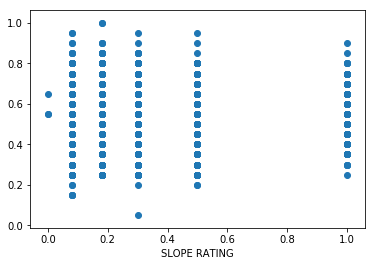

In [155]:
plt.scatter(feature_set_ndvi['SLOPE_VAL'], feature_set_ndvi['TRI_VAL'])
plt.xlabel("SLOPE RATING")
plt.show()

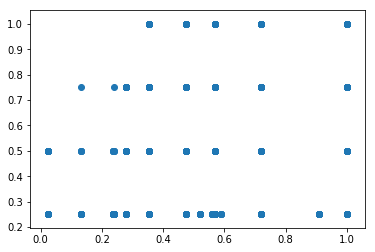

In [156]:
plt.scatter(feature_set['SOIL_INTEGRITY'], feature_set['EQ_HZ_RATING'])
# plt.xlabel("COVER TYPE")
plt.show()

In [157]:
feature_set['EQ_HZ_RATING'].unique()

array([0.5 , 0.25, 1.  , 0.75])

In [158]:
feature_set['SOIL_INTEGRITY'].unique()

array([1.    , 0.2376, 0.354 , 0.59  , 0.5688, 0.132 , 0.56  , 0.91  ,
       0.24  , 0.72  , 0.52  , 0.474 , 0.28  , 0.024 ])

In [159]:
feature_set['SLOPE_VAL'].unique()

array([0.08, 0.18, 0.3 , 0.5 , 1.  , 0.  ])

In [160]:
# plt.scatter(sample["ELEVATION"])
# plt.xlabel("ELEVATION")
# plt.show()

In [161]:
feature_set_ndvi.columns

Index(['NDVI', 'POINT', 'ASPECT_CODE_16_VAL', 'SLOPE_VAL', 'ELEVATION',
       'TRI_VAL', 'FAULT_DISTANCE', 'WATER_DISTANCE', 'EQ_HZ_RATING',
       'RF_HZ_RATING', 'SOIL_INTEGRITY', 'LULC'],
      dtype='object')

<h2>Using Analytical Hierarchy Process(AHP) </h2>
<br>
"The AHP method, developed by Saaty (Saaty, 1977), is an important multiple-criteria decision-making method (Vaidya and Kumar, 2006), which has been applied for landslide susceptibility assessment for many years (Akgun, 2012; Barredo et al., 2000; Kayastha et al., 2013; Komac, 2006; Pourghasemi et al., 2012; Yalcin, 2008)." (Yaning Yi,Zhijie Zhang, et. al, 2019)

In [162]:
truths = ['HZ_RATING', 'LANDSLIDE']

features = ['ELEVATION', 'SLOPE_VAL', 'ASPECT_CODE_16_VAL', 'SOIL_INTEGRITY', 'FAULT_DISTANCE', 'LULC', 'TRI_VAL', 'WATER_DISTANCE', 'NDVI', 'RAINFALL']

# pairwise = []

# for index_x in range(len(features)):
#     y = []
#     for index_y in range(len(features)):
#         if(index_x > index_y):
#             val = 1 / pairwise[index_y][index_x]
#         elif(index_x != index_y):
#             print(features[index_x] + ' / ' + features[index_y] + ':');
#             val = float(input())
#         else: 
#             print(features[index_x] + ' / ' + features[index_y] + ': 1');
#             val = 1
#         y.append(val)
#     pairwise.append(y)



In [163]:
# print(pairwise)

In [164]:
# pairwise_cleaned = pairwise

# for x in range(10):
#     for y in range(10):
#         if(pairwise_cleaned[x][y] > 2 and pairwise_cleaned[x][y] < 3):
#             pairwise_cleaned[x][y] = 3

In [165]:
    
# pairwise_matrix = pd.DataFrame(pairwise_cleaned, columns=list(features))

In [166]:
# pairwise_matrix.to_csv(r'pair_wise_matrix.csv',index = None, header=True)
pairwise_matrix = pd.read_csv("pair_wise_matrix.csv")
pairwise_matrix.round(2)

,ELEVATION,SLOPE_VAL,ASPECT_CODE_16_VAL,SOIL_INTEGRITY,FAULT_DISTANCE,LULC,TRI_VAL,WATER_DISTANCE,NDVI,RAINFALL
0,1.0,0.25,2.0,0.33,0.25,1.0,0.33,0.5,2.0,0.33
1,4.0,1.00,4.0,2.00,1.00,3.0,2.00,3.0,4.0,1.00
2,0.5,0.25,1.0,0.33,0.25,0.5,0.33,0.5,1.0,0.25
3,3.0,0.50,3.0,1.00,0.50,1.0,0.50,2.0,3.0,0.50
4,4.0,1.00,4.0,2.00,1.00,2.0,1.00,3.0,4.0,0.50
5,1.0,0.33,2.0,1.00,0.50,1.0,0.50,1.0,2.0,1.00
6,3.0,0.50,3.0,2.00,1.00,2.0,1.00,2.0,3.0,0.50
7,2.0,0.33,2.0,0.50,0.33,1.0,0.50,1.0,2.0,1.00
8,0.5,0.25,1.0,0.33,0.25,0.5,0.33,0.5,1.0,0.33
9,3.0,1.00,4.0,2.00,2.00,1.0,2.00,1.0,3.0,1.00


In [167]:
pairwise_matrix_cal = pairwise_matrix.copy()

print(pairwise_matrix_cal.columns)
# pairwise_matrix_cal = pairwise_matrix_cal.drop(columns=["RAINFALL"])
# pairwise_matrix_cal = pairwise_matrix_cal.drop(pairwise_matrix_cal.index[9])

def updateVal(x, y, val):
    pairwise_matrix_cal[features[y]][x] = val
    pairwise_matrix_cal[features[x]][y] = 1/val

fcount = len(features)

# pairwise_matrix_cal.to_csv(r'pair_wise_matrix.csv',index = None, header=True)

sums = pairwise_matrix_cal.sum(axis = 0, skipna = True) 
pairwise_normalized = pairwise_matrix_cal.copy()

for column in range(fcount):
    for row in range(fcount):
        pairwise_normalized[features[column]][row] = pairwise_normalized[features[column]][row]/sums[column]

        # pairwise_normalized = pd.DataFrame(pairwise_normalized, columns=list(features))
pairwise_normalized['WEIGHTS'] = pairwise_normalized.mean(axis=1)
print(pairwise_normalized['WEIGHTS'])
# pairwise_matrix_cal
pairwise_normalized

Index(['ELEVATION', 'SLOPE_VAL', 'ASPECT_CODE_16_VAL', 'SOIL_INTEGRITY',
       'FAULT_DISTANCE', 'LULC', 'TRI_VAL', 'WATER_DISTANCE', 'NDVI',
       'RAINFALL'],
      dtype='object')
0    0.051470
1    0.182471
2    0.036257
3    0.097347
4    0.155214
5    0.078171
6    0.126687
7    0.076012
8    0.037505
9    0.158866
Name: WEIGHTS, dtype: float64


,ELEVATION,SLOPE_VAL,ASPECT_CODE_16_VAL,SOIL_INTEGRITY,FAULT_DISTANCE,LULC,TRI_VAL,WATER_DISTANCE,NDVI,RAINFALL,WEIGHTS
0,0.045454,0.046211,0.076922,0.028721,0.035294,0.076923,0.039212,0.034483,0.079999,0.051482,0.051470
1,0.181816,0.184843,0.153844,0.174064,0.141176,0.230769,0.235297,0.206897,0.159998,0.156006,0.182471
2,0.022727,0.046211,0.038461,0.028721,0.035294,0.038462,0.039212,0.034483,0.040000,0.039002,0.036257
3,0.136362,0.092421,0.115383,0.087032,0.070588,0.076923,0.058824,0.137931,0.119999,0.078003,0.097347
4,0.181816,0.184843,0.153844,0.174064,0.141176,0.153846,0.117648,0.206897,0.159998,0.078003,0.155214
5,0.045454,0.060998,0.076922,0.087032,0.070588,0.076923,0.058824,0.068966,0.079999,0.156006,0.078171
6,0.136375,0.092421,0.115395,0.174064,0.141176,0.153846,0.117648,0.137931,0.120011,0.078003,0.126687
7,0.090908,0.060998,0.076922,0.043516,0.047059,0.076923,0.058824,0.068966,0.079999,0.156006,0.076012
8,0.022727,0.046211,0.038461,0.028721,0.035294,0.038462,0.039212,0.034483,0.040000,0.051482,0.037505
9,0.136362,0.184843,0.153844,0.174064,0.282353,0.076923,0.235297,0.068966,0.119999,0.156006,0.158866


In [168]:
pairwise_consistency = pairwise_matrix_cal.copy()

# print(pairwise_normalized['WEIGHTS'])

for column in range(fcount):
    for row in range(fcount):
#         print(features[column] + ': ' + str(row) + ' = ' + str(pairwise_consistency[features[column]][row]))
        pairwise_consistency[features[column]][row] = pairwise_consistency[features[column]][row] * pairwise_normalized['WEIGHTS'][column]

pairwise_consistency['W_SUM'] = pairwise_consistency.sum(axis=1)    
pairwise_consistency['WEIGHTS'] = pairwise_normalized['WEIGHTS']
pairwise_consistency['RATIO'] = pairwise_consistency['W_SUM']/pairwise_normalized['WEIGHTS']
lambda_max = pairwise_consistency['RATIO'].mean()
consistency_index = (lambda_max-fcount)/(fcount-1)

random_index = [0, 0, 0.58, 0.9, 1.12, 1.24, 1.32, 1.41, 1.45, 1.49]

consistency_ratio = consistency_index / random_index[fcount-1]

print(pairwise_consistency)
print(lambda_max)
# print(pairwise_consistency['RATIO'])
print(consistency_index)
print(consistency_ratio)

   ELEVATION  SLOPE_VAL  ASPECT_CODE_16_VAL  SOIL_INTEGRITY  FAULT_DISTANCE  \
0   0.051470   0.045618            0.072514        0.032124        0.038803   
1   0.205880   0.182471            0.145028        0.194693        0.155214   
2   0.025735   0.045618            0.036257        0.032124        0.038803   
3   0.154410   0.091236            0.108771        0.097347        0.077607   
4   0.205880   0.182471            0.145028        0.194693        0.155214   
5   0.051470   0.060215            0.072514        0.097347        0.077607   
6   0.154426   0.091236            0.108782        0.194693        0.155214   
7   0.102940   0.060215            0.072514        0.048673        0.051738   
8   0.025735   0.045618            0.036257        0.032124        0.038803   
9   0.154410   0.182471            0.145028        0.194693        0.310427   

       LULC   TRI_VAL  WATER_DISTANCE      NDVI  RAINFALL     W_SUM   WEIGHTS  \
0  0.078171  0.042225        0.038006  0.075010  

In [169]:
pairwise_show = pairwise_matrix_cal.copy()
pairwise_show['WEIGHTS'] = pairwise_normalized['WEIGHTS']
pairwise_show['FN'] = features
pairwise_show.set_index('FN')

pairwise_show

,ELEVATION,SLOPE_VAL,ASPECT_CODE_16_VAL,SOIL_INTEGRITY,FAULT_DISTANCE,LULC,TRI_VAL,WATER_DISTANCE,NDVI,RAINFALL,WEIGHTS,FN
0,1.0000,0.25,2.0000,0.33,0.250000,1.0,0.3333,0.5,2.0000,0.33,0.051470,ELEVATION
1,4.0000,1.00,4.0000,2.00,1.000000,3.0,2.0000,3.0,4.0000,1.00,0.182471,SLOPE_VAL
2,0.5000,0.25,1.0000,0.33,0.250000,0.5,0.3333,0.5,1.0000,0.25,0.036257,ASPECT_CODE_16_VAL
3,3.0000,0.50,3.0000,1.00,0.500000,1.0,0.5000,2.0,3.0000,0.50,0.097347,SOIL_INTEGRITY
4,4.0000,1.00,4.0000,2.00,1.000000,2.0,1.0000,3.0,4.0000,0.50,0.155214,FAULT_DISTANCE
5,1.0000,0.33,2.0000,1.00,0.500000,1.0,0.5000,1.0,2.0000,1.00,0.078171,LULC
6,3.0003,0.50,3.0003,2.00,1.000000,2.0,1.0000,2.0,3.0003,0.50,0.126687,TRI_VAL
7,2.0000,0.33,2.0000,0.50,0.333333,1.0,0.5000,1.0,2.0000,1.00,0.076012,WATER_DISTANCE
8,0.5000,0.25,1.0000,0.33,0.250000,0.5,0.3333,0.5,1.0000,0.33,0.037505,NDVI
9,3.0000,1.00,4.0000,2.00,2.000000,1.0,2.0000,1.0,3.0000,1.00,0.158866,RAINFALL


In [170]:
data_set = pd.merge(feature_set_ndvi, landslides, on='POINT', how='left')

<h3>Split Data Set 80% Training - 20% Test</h3>

In [171]:
from sklearn.model_selection import train_test_split

data_set_ls = data_set[data_set['LS_VALUE'] == 1]
data_set_non_ls = data_set[data_set['LS_VALUE'] == 0]
ls_train, ls_test = train_test_split(data_set_ls, test_size=0.2)
non_ls_train, non_ls_test = train_test_split(data_set_non_ls, test_size=0.2)

data_set_train = pd.concat([ls_train, non_ls_train])
data_set_test = pd.concat([ls_test, non_ls_test])

In [172]:
len(data_set_ls)

2993

In [173]:
print(len(data_set_train))
print(len(data_set_test))

print(len(data_set))
print(len(data_set_train) + len(data_set_test))

189142
47287
236429
236429


<h2>Calculating the Frequency Ratio (FR) </h2>
<br>
"The FR method is one of the most widely used approaches to assess the landslide susceptibility at a regional scale (Guo etal.,2015;Lietal.,2017;Mohammadyetal.,2012),which is based on the observed spatial relationship between landslide locations and controlling factors (Lee and Pradhan, 2007; Poudyal et al., 2010)." (Yaning Yi,Zhijie Zhang, et. al, 2019)

<h3>Land Feature FRs</h3>

In [174]:
# FRi = (Ncell(Si) / Ncell(Ni))/ (LS_points / ds_count)
dfc = data_set_train.copy()
ls_points = len(dfc[dfc['LS_VALUE'] == 1.0])
ds_count = len(data_set) - ls_points
frD = ls_points/ds_count 

print(ls_points)
print(ds_count)
print(frD)

2394
234035
0.010229239216356528


In [175]:

FR = {}

# count all points where feature with value c is in a landlslide area
def calculateSi(feat, c):
    dfc_copy = dfc[dfc['LS_VALUE'] == 1.0]
    return len(dfc_copy[dfc_copy[feat] == c])

# count all points where the class for feature is c
def calculateNi(feat, c):
    return len(dfc[dfc[feat] == c])

for feat in features:
    if(feat == 'RAINFALL'):
        continue
    fri = {}
    print(feat) 
    fset = data_set[feat].unique()
    for c in fset:
        ni = calculateNi(feat,c)
        if( ni == 0):
            ni = 0.000001
        f = (calculateSi(feat, c) / ni)/frD
        fri[c] = f
    FR[feat] = fri
        

ELEVATION
SLOPE_VAL
ASPECT_CODE_16_VAL
SOIL_INTEGRITY
FAULT_DISTANCE
LULC
TRI_VAL
WATER_DISTANCE
NDVI


In [176]:
FR

{'ELEVATION': {0.15: 0.46916724242809477,
  0.1: 0.8547066488127254,
  0.2: 1.1933021128721648,
  0.0: 1.6501112973952357,
  0.05: 2.185773257081077,
  0.3: 0.6995275905924621,
  0.25: 1.6190622852814935,
  0.35: 0.0,
  0.4: 0.0,
  0.45: 0.0,
  0.5: 0.0,
  0.95: 0.0,
  0.75: 0.0,
  0.65: 0.0,
  1.0: 0.0,
  0.55: 0.0,
  0.6: 0.0,
  0.7: 0.0,
  0.9: 0.0,
  0.85: 0.0,
  0.8: 0.0},
 'SLOPE_VAL': {0.08: 0.9724500594000574,
  0.18: 1.0720685788075826,
  0.3: 1.4651060737514474,
  0.5: 1.4697249958609508,
  1.0: 2.187644461515452,
  0.0: 0.0},
 'ASPECT_CODE_16_VAL': {0.315: 1.3406751986873413,
  0.2925: 0.975750278639138,
  0.0675: 1.4114199849374558,
  0.09: 1.888302244544964,
  0.045: 1.519569649512382,
  0.33749999999999997: 1.284612099675382,
  0.22499999999999998: 0.7871727255438972,
  0.20249999999999999: 1.4337983848510165,
  0.135: 1.587596439974313,
  0.11249999999999999: 1.1780095541455067,
  0.18: 1.1018099997615685,
  0.0225: 1.4590892654521876,
  0.0: 1.3978881904475202,
  0.1575

<h3>Rainfall FR</h3>

In [177]:
FRR = {0.2:0.1, 0.4:0.25, .6:0.5, .8:0.75, 1:0.1}

<h2>Calculate Integrated Weighted Index</h2>

In [178]:
dfsc = data_set.copy()
dfsc.columns
dfsc['TRI_VAL'].unique()



array([0.55, 0.5 , 0.45, 0.6 , 0.4 , 0.35, 0.7 , 0.65, 0.75, 0.8 , 0.3 ,
       0.25, 0.9 , 0.85, 0.2 , 0.15, 0.95, 1.  , 0.05])

In [179]:
weights = pairwise_show['WEIGHTS']
print(features)


def calcIwI(elev, slope, aspect, si, fd, lulc, tri, wd, ndvi):
        vals = [elev, slope, aspect, si, fd, lulc, tri, wd, ndvi]
        weighted_index = 0
        for x in range(len(features)-1):
            try:
                FRval = FR[features[x]][vals[x]]
                weighted_index += weights[x] * FRval
            except:
                print(features[x])
                return np.nan()
        return weighted_index

['ELEVATION', 'SLOPE_VAL', 'ASPECT_CODE_16_VAL', 'SOIL_INTEGRITY', 'FAULT_DISTANCE', 'LULC', 'TRI_VAL', 'WATER_DISTANCE', 'NDVI', 'RAINFALL']


In [180]:
dfsc['IW_INDEX'] = dfsc.apply(lambda row: calcIwI(row['ELEVATION'], row['SLOPE_VAL'], row['ASPECT_CODE_16_VAL'], row['SOIL_INTEGRITY'], row['FAULT_DISTANCE'], row['LULC'], row['TRI_VAL'], row['WATER_DISTANCE'], row['NDVI']), axis = 1)

<h2>Find Mean of Landslide Areas and apply classification to whole data set</h2>

In [181]:
print(dfsc['IW_INDEX'].min())
print(dfsc['IW_INDEX'].max())

0.4265374796070114
9.793671614579297


In [182]:
# dfsc.iloc[dfsc['IW_INDEX'].idxmax()]

def getLsClass(value):
    if(value > 1.8):
        return 7
    if(value > 1.6):
        return 6
    if(value > 1.4):
        return 5
    if(value > 1.2):
        return 4
    if(value > 1):
        return 3
    if(value > 0.7):
        return 2
    if(value < 0.7):
        return 1
    
def getLsClassNew(value):
    if(value > 1.8):
        return 7
    if(value > 1.6):
        return 6
    if(value > 1.36):
        return 5
    if(value > 1.12):
        return 4
    if(value > .88):
        return 3
    if(value > 0.64):
        return 2
    if(value < 0.64):
        return 1
    
# dflx = dfsc[dfsc['LS_VALUE'] == 1]
dflx = dfsc.copy()

# dflx.std(axis = 0, skipna = True) 

In [183]:
dflx['LS_CLASS'] = dflx['IW_INDEX'].apply(getLsClassNew)

In [184]:
dflx_ls = dflx[dflx['LS_VALUE'] == 1]

In [187]:
def adjustIwi(iwi, weather):
    return iwi + (FRR[(weather/5)] * weights[9])

In [188]:
dflx_ls['CONT_ADJ_IWI'] = dflx_ls.apply(lambda row: adjustIwi(row['IW_INDEX'], 5), axis = 1)
dflx_ls['ADJS_LS_CLASS'] = dflx_ls['CONT_ADJ_IWI'].apply(getLsClassNew)

c:\users\ramon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\ramon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [189]:
total = len(dflx_ls) 
subtotal = len(dflx_ls[dflx_ls['CONT_ADJ_IWI'] > 0.95])

print(total)
print(subtotal)
print(subtotal/total)

2993
2861
0.9558970932175075


In [190]:
ffdx = dflx_ls[dflx_ls['IW_INDEX'] > 0.88]

In [195]:
len(ffdx[ffdx['IW_INDEX'] > .95])

2793

In [196]:
minfx = dflx['IW_INDEX'].min()
print(minfx)
print(len(dflx))
print(len(dflx[dflx['IW_INDEX'] > 1]))
print(dflx['IW_INDEX'].max())

0.4265374796070114
236429
112367
9.793671614579297


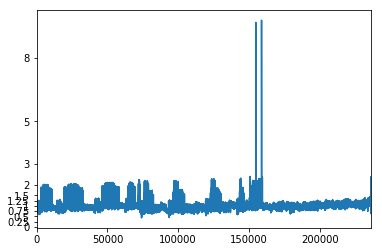

In [197]:
dflx.sort_values(by=['IW_INDEX'], ascending=True)

y_values = [0,0.25,0.5,0.75,1,1.25,1.5,2,3,5,8]
yticks=['0','0.25','0.5','0.75','1','1.25', '1.5', '2', '3', '5', '8']
plt.yticks(y_values,yticks)
lines = dflx['IW_INDEX'].plot.line()

In [198]:
# plt.style.use('seaborn-whitegrid')
# fig = plt.figure()
# ax = plt.axes()
# # ax = plt.gca()
# ax.set_xscale('log')

# y_values = [0,0.25,0.5,0.75,1,1.25,1.5,2,3,5,8]
# yticks=['0','0.25','0.5','0.75','1','1.25', '1.5', '2', '3', '5', '8']

# x_values = [0,1]
# xticks=['ABSENT','PRESENT']
# plt.yticks(y_values,yticks)
# plt.xticks(x_values,xticks)
# ax.plot(dflx['LS_VALUE'], dflx['IW_INDEX']);

# plt.scatter(dflx['LS_VALUE'], dflx['IW_INDEX'])
# plt.xlabel("LS FOUND [1: YES, 0: NO]")
# plt.ylim([0, 7])
# plt.show()

In [199]:
# plt.plot(normalized_X)
# plt.ylabel("QGIS SLOPE")
# plt.show()

# x_array = np.array(sample_slope['QGIS_SLOPE'])
# normalized_X = preprocessing.normalize([x_array])

In [200]:
dflx.sort_values(by=['LS_CLASS'], ascending=True)
dflx[dflx['LS_VALUE'] == 1]['LS_CLASS'].value_counts()

# 7    1258
# 6     171
# 5       2
# 4      79
# 3     951
# 2     532
# 1       0

# 1       0
# 2     537
# 3     909
# 4     113
# 5       5
# 6     218
# 7    1211


3    1288
7    1224
4     240
6     205
2      32
5       4
Name: LS_CLASS, dtype: int64

<h2>Map Hazard</h2>

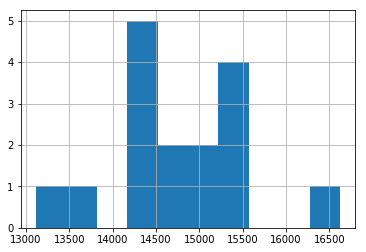

In [201]:
dflx['ASPECT_CODE_16_VAL'].value_counts().hist()
# dflx

In [202]:
dflxp = dflx.copy()


In [203]:
# Bounding Box
lg_max_lon = 14.565927
lg_min_lon = 13.965200
lg_max_lat = 121.677325
lg_min_lat = 120.882250

BBox = ((lg_min_lon,lg_max_lon,lg_min_lat,lg_max_lat))

In [204]:
def getLonLatSeries(point):
    tup = getLatLonCoordsByPoint(point)
    return pd.Series({"LON": tup[0], "LAT": tup[1]})

colors ={7:"#f55656",6:"#f57656",5:"#ff6a0d",4:"#ff9e0d",3:"#b4e83a",2:"#8de31e",1:"#2f54eb"}
def getColor(value):
    return colors[value]

In [205]:
ruh_m = plt.imread('Boundary.png')

In [206]:
dflxp[['LON', 'LAT']] = dflxp['POINT'].apply(getLonLatSeries)

In [207]:
dflxp['COLOR'] = dflxp['LS_CLASS'].apply(getColor)

In [208]:
dflxpcopy = dflxp[['SLOPE_VAL', 'TRI_VAL', 'SOIL_INTEGRITY', 'FAULT_DISTANCE','IW_INDEX', 'LS_CLASS']]

In [210]:
import random

In [211]:
dflxpcopy['RAINFALL'] = random.randint(1,5)

c:\users\ramon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [212]:
dflxpcopy['ADJ_IWI'] = dflxpcopy.apply(lambda row: adjustIwi(row['IW_INDEX'], row['RAINFALL']), axis = 1)

c:\users\ramon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [213]:
dflxpcopy['ADJ_LS_CLASS'] = dflxpcopy['ADJ_IWI'].apply(getLsClass)

c:\users\ramon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [214]:
dflxpcopy.std()

SLOPE_VAL         0.171027
TRI_VAL           0.056503
SOIL_INTEGRITY    0.229732
FAULT_DISTANCE    0.078957
IW_INDEX          0.239880
LS_CLASS          0.990888
RAINFALL          0.000000
ADJ_IWI           0.239880
ADJ_LS_CLASS      1.135109
dtype: float64

In [215]:
dflxpcopy = dflxpcopy.drop(columns=["LS_CLASS","IW_INDEX","ADJ_IWI"])

In [216]:
dflxpcopy

,SLOPE_VAL,TRI_VAL,SOIL_INTEGRITY,FAULT_DISTANCE,RAINFALL,ADJ_LS_CLASS
0,0.08,0.55,0.7200,0.2551,5,2
1,0.08,0.55,0.7200,0.2551,5,2
2,0.08,0.55,0.7200,0.2551,5,2
3,0.08,0.55,0.7200,0.2551,5,2
4,0.08,0.55,0.7200,0.2551,5,2
5,0.08,0.55,0.7200,0.2551,5,2
6,0.08,0.50,0.7200,0.2551,5,2
7,0.08,0.45,0.7200,0.2551,5,2
8,0.08,0.60,0.7200,0.2551,5,2
9,0.08,0.50,0.7200,0.2551,5,2


In [217]:
dflxpcopy.to_csv(r'REGR_data_set_ADJ_LS.csv',index = None, header=True)

In [218]:
dflxp.to_csv(r'base_classification.csv',index = None, header=True)

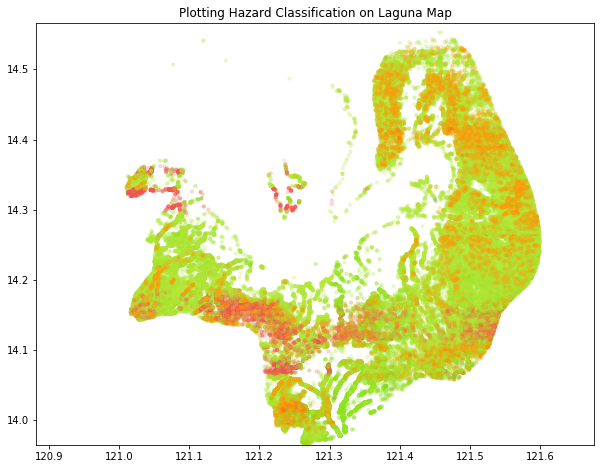

In [219]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(dflxp['LAT'], dflxp['LON'], zorder=1, alpha= 0.2, c=dflxp['COLOR'], s=10)
ax.set_title('Plotting Hazard Classification on Laguna Map')
ax.set_xlim(BBox[2],BBox[3])
ax.set_ylim(BBox[0],BBox[1])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
plt.savefig('D:\\CS190App\\web-app\\hazard-map\\src\\images\\base_class.png')

<h2>Weather and Rainfall Generator</h2>

In [220]:
import random

In [221]:
def isInBound(bb):
    if( bb.ix <= p.x and p.x <= bb.ax and bb.iy <= p.y and p.y <= bb.ay ):
#          Point is in bounding box
        return True
    

In [222]:
w_matrix = [[1, 1, 1, 2, 3, 3, 3, 2, 1, 1],
            [1, 2, 2, 2, 4, 4, 4, 3, 3, 2],
            [2, 3, 5, 5, 5, 4, 4, 3, 2, 2],
            [3, 4, 5, 5, 5, 4, 4, 3, 3, 3],
            [2, 4, 5, 5, 5, 3, 2, 2, 3, 3],
            [1, 3, 5, 5, 1, 2, 2, 2, 3, 3],
            [1, 2, 1, 2, 2, 2, 3, 3, 3, 3],
            [1, 1, 2, 3, 3, 3, 3, 3, 2, 2],
            [1, 2, 3, 4, 4, 4, 3, 3, 3, 2],
            [1, 1, 3, 4, 4, 4, 3, 3, 3, 2]]

rand_w_matrix = []

def compareMin(a, b):
    if(a < b):
        return int(a)
    else:
        return int(b)
        
def compareMax(a, b):
    if(a > b):
        return int(a)
    else:
        return int(b)

def getBoundary(r, c, deg, prev=1, level=1):
    bound = {'min':level, 'max':level}
    bound['min'] = level
    bound['max'] = level
    coords = [[r,c-1], [r-1,c-1], [r-1, c], [r-1, c+1]]
    if(r == 0 and c == 0):
        bound['max'] = 5
        return bound
    
    for rc in coords:
#         print("rc: " + str(rc[0]) + ',' + str(rc[1]))
        if(rc[0] >= 0):
            if (rc[0] == r and rc[1] == c-1):
                bound['min'] = compareMin(bound['min'], prev)
                bound['max'] = compareMax(bound['max'], prev)
            elif(rc[1] >= 0):
                if(rc[1] > deg-1):
                    return bound
                bound['min'] = compareMin(bound['min'], rand_w_matrix[rc[0]][rc[1]])
                bound['max'] = compareMax(bound['max'], rand_w_matrix[rc[0]][rc[1]])
    return bound           

        
def randomizeWMatrix(deg, level):
    for r in range(deg):
        row = []
        for c in range(deg):
            prev = level
            if(c > 0):
                prev = row[c-1]
            bound = getBoundary(r, c, deg, prev, level)
            random_weather = random.randint(bound['min'], bound['max'])
            row.append(random_weather)
        rand_w_matrix.append(row)
            
# LL 13.992474, 120.882250
# TR 14.561454, 121.677325
# TL 14.561454, 120.882250
# LR 13.992474, 121.677325

# print(((14.561454 - 13.992474)/2) + 13.992474)
# print(((121.677325 - 120.882250)/2) + 120.882250)

In [223]:
rand_w_matrix = []
randomizeWMatrix(20, 3)
rand_w_matrix

[[4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 4, 4, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3,

<h2>Get Weather Quadrant</h2>

In [224]:
lg_max_lon = 14.565927
lg_min_lon = 13.965200
lg_max_lat = 121.677325
lg_min_lat = 120.882250

dist_lon = 14.565927 - 13.965200
dist_lat = 121.677325 - 120.882250

quadrants = 10

denom_lon = dist_lon/quadrants
denom_lat = dist_lat/quadrants

def getQuadrant(lon, lat):
    norm_lon = lon - lg_min_lon
    q_lon = int(norm_lon/denom_lon)
    norm_lat = lat - lg_min_lat
    q_lat = int(norm_lat/denom_lat)
    return (q_lon, q_lat)

def getWeather(lon, lat, matrix):
    quad = getQuadrant(lon, lat)
    return matrix[quad[0]][quad[1]]

In [225]:
# 285417.4602417005, 1544775.6368829422
# 348873.4731547999, 1610781.94250232

# getLatLonCoords(348873.4731547999, 1610781.94250232)

In [226]:
# plt.plot(sample_slope["SLOPE_CODE"], sample["ELEVATION_1"])
# plt.xlabel("SLOPE CODE")
# plt.ylabel("ELEVATION")
# plt.show()

<h2>Add Mock Weather Data to dataset</h2>

In [227]:
def getWeatherUsingPoint(point):
    lonlat = getLatLonCoordsByPoint(str(point))
#     print(lonlat)
#     getQuadrant(lonlat[0], lonlat[1])
    return getWeather(lonlat[0], lonlat[1], w_matrix)

In [228]:
applied_weather = dflxp.copy()
applied_weather['WEATHER'] = applied_weather['POINT'].apply(getWeatherUsingPoint)

In [229]:
# applied_weather.to_csv(r'data_set_with_mock_weather.csv',index = None, header=True)

<h4>Add Rainfall weight index</h4>

In [230]:
applied_weather['WEATHER'].unique()

array([3, 4, 5, 2, 1], dtype=int64)

In [231]:
FRR

{0.2: 0.1, 0.4: 0.25, 0.6: 0.5, 0.8: 0.75, 1: 0.1}

In [232]:
weights[9]

0.15886566639279973

In [233]:
weights

0    0.051470
1    0.182471
2    0.036257
3    0.097347
4    0.155214
5    0.078171
6    0.126687
7    0.076012
8    0.037505
9    0.158866
Name: WEIGHTS, dtype: float64

In [234]:
applied_weather['ADJ_INDEX'] = applied_weather.apply(lambda row: adjustIwi(row['IW_INDEX'], row['WEATHER']), axis = 1)

In [235]:
applied_weather['ADJ_LS_CLASS'] = applied_weather['ADJ_INDEX'].apply(getLsClass)

In [236]:
applied_weather['ADJ_COLOR'] = applied_weather['ADJ_LS_CLASS'].apply(getColor)

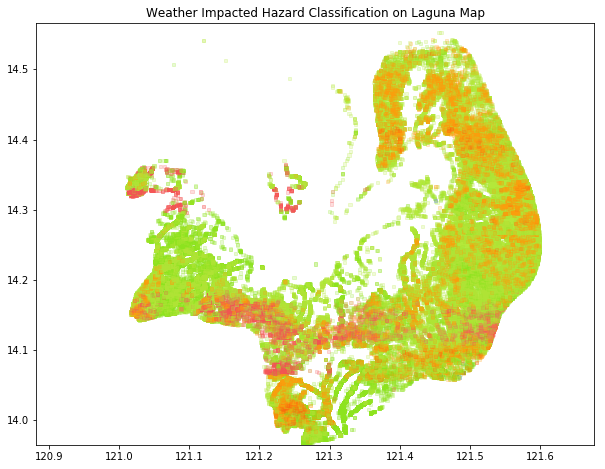

In [237]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(applied_weather['LAT'], applied_weather['LON'], zorder=1, alpha= 0.2, c=applied_weather['ADJ_COLOR'], s=10, marker="s")
ax.set_title('Weather Impacted Hazard Classification on Laguna Map')
ax.set_xlim(BBox[2],BBox[3])
ax.set_ylim(BBox[0],BBox[1])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
plt.savefig('D:\\CS190App\\web-app\\hazard-map\\src\\images\\adjusted_class.png')

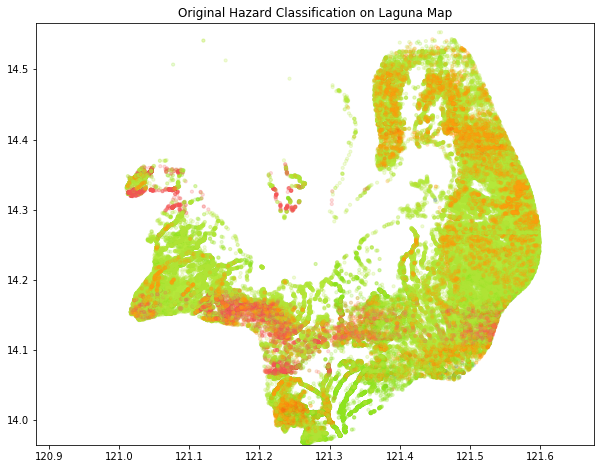

In [238]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(dflxp['LAT'], dflxp['LON'], zorder=1, alpha= 0.2, c=dflxp['COLOR'], s=10)
ax.set_title('Original Hazard Classification on Laguna Map')
ax.set_xlim(BBox[2],BBox[3])
ax.set_ylim(BBox[0],BBox[1])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [239]:
from PIL import Image
import os

def transpy(file_src, file_dest):
    img = Image.open(file_src)
    img = img.convert("RGBA")
    datas = img.getdata()

    newData = []
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)

    img.putdata(newData)
    img.save(file_dest, "PNG")

In [240]:
file_dest = os.path.join('D:\\CS190App\\web-app\\hazard-map\\src\\images', 'base_class.png')
file_src = "base_class.png"
transpy(file_src, file_dest)

In [241]:
file_dest = os.path.join('D:\\CS190App\\web-app\\hazard-map\\src\\images', 'adjusted_class.png')
file_src = "adjusted_class.png"
transpy(file_src, file_dest)

In [242]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
param_grid

{'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
        1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])}

<h1>Application of SVR and other Machine Learning Models</h1>

<h2>Application of ML Models without feature scaling</h2>

<h5>Feature Selection</h5>

In [ ]:
# ml_set = applied_weather.copy()
# # ml_set = ml_set.drop(columns=["ADJ_INDEX", "EQ_HZ_RATING", "RF_HZ_RATING", "LS_VALUE", "POINT", "WEATHER"])
# ml_set = ml_set.drop(columns=["ADJ_INDEX","ADJ_LS_CLASS", "ADJ_COLOR", "COLOR", "EQ_HZ_RATING", "RF_HZ_RATING", "LS_VALUE", "POINT", "WEATHER", "IW_INDEX", "LON", "LAT"])

In [ ]:
# # ml_set
# print(ml_set['LS_CLASS'].max())
# print(ml_set['LS_CLASS'].min())

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from joblib import dump, load

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix

from matplotlib import cm
from matplotlib import pyplot
from matplotlib.mlab import griddata
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.plotting import plot_decision_regions

In [ ]:
# svrs = [svr_rbf, svr_lin, svr_poly]
# kernel_label = ['RBF', 'Linear', 'Polynomial']
# model_color = ['m', 'c', 'g']
# feature_set.iloc[:,1:12].values
# feature_set.iloc[:,12].values

In [ ]:
# plt.scatter(land_use_cover["COVER"],land_use_cover["USE"])


<h4>Support Vector Regression</h4>

In [ ]:
# regressor = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
# regressor = SVR(kernel='linear', C=100, gamma='auto')
# regressor = SVR(kernel='poly', C=100, gamma='auto', degree=8, epsilon=.1,
#                coef0=1)

In [ ]:
# xtrain,xtest,ytrain,ytest=train_test_split(ml_set.iloc[:,0:8].values,ml_set.iloc[:,9].values)
# regressor=SVR(kernel='poly',degree=8)

# regressor.fit(xtrain,ytrain)

<h4>Support Vector Classification</h4>

In [ ]:
# regressor = SVC(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
# regressor = SVC(kernel='linear', C=100, gamma='auto')
# regressor = SVC(kernel='poly', C=100, gamma='auto', degree=8, epsilon=.1,
#                coef0=1)

<h4>Split data Train - Test</h4>

In [ ]:
# xtrain,xtest,ytrain,ytest=train_test_split(ml_set.iloc[:,0:8].values,ml_set.iloc[:,9].values, test_size=0.20)
# regressor.fit(xtrain,ytrain)

In [ ]:
# dump(regressor, 'SVR_poly8_IwI.joblib') 
# regressor = load('SVR_linear.joblib') 
# regressor = load('SVR_rbf.joblib')
# regressor = load('SVR_rbf_IwI.joblib')

In [ ]:
# pred=regressor.predict(xtest)

In [ ]:
# print(regressor.score(xtest,ytest))
# print(r2_score(ytest,pred))



In [ ]:

# 0.13041458786072635 - linear
# 0.3190365149153779 - rbf

In [ ]:
# Plot Decision Region using mlxtend's awesome plotting function
# plot_decision_regions(X=X.values, 
#                       y=y.values,
#                       clf=clf, 
#                       legend=2)

# Update plot object with X/Y axis labels and Figure Title
# plt.xlabel(X.columns[0], size=14)
# plt.ylabel(X.columns[1], size=14)
# plt.title('SVM Decision Region Boundary', size=16)

<h2>Machine Learning Models with Feature Scaling</h2>

In [ ]:
# ml_set = applied_weather.copy()
# ml_set = ml_set.drop(columns=["ADJ_INDEX","ADJ_LS_CLASS", "ADJ_COLOR", "COLOR", "EQ_HZ_RATING", "RF_HZ_RATING", "LS_VALUE", "POINT", "WEATHER", "IW_INDEX", "LON", "LAT"])
# ml_set.shape
# ml_set.columns

In [ ]:
# #feature scaling
# S = ml_set.iloc[:,0:8].values
# t = ml_set.iloc[:,9].values

# sc_S = StandardScaler()
# sc_t = StandardScaler()
# t = t.reshape(-1, 1)
# S2 = sc_S.fit_transform(S)
# t2 = sc_t.fit_transform(t)

In [ ]:
# xtrain,xtest,ytrain,ytest=train_test_split(S2,t2)

<h4>Support Vector Regression</h4>

In [ ]:
#regressor = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
# regressor = SVR(kernel='linear', C=100, gamma='auto')
# regressor = SVR(kernel='poly', C=100, gamma='auto', degree=8, epsilon=.1,
#                coef0=1)
#regressor.fit(xtrain, ytrain)
# pred=regressor.predict(xtest)

In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.model_selection import GridSearchCV

# # Dataset for decision function visualization: we only keep the four highest weighted features

# #SLOPE, FAULT_DISTANCE, TRI_VAL, SOIL_INTEGRITY

# dftrain = ml_set[['SLOPE_VAL','FAULT_DISTANCE','TRI_VAL', 'SOIL_INTEGRITY', 'LS_CLASS']]

# # data_set_ls = dftrain[dftrain['LS_CLASS'] == 1]
# # data_set_non_ls = dftrain[dftrain['LS_CLASS'] == 0]
# # ls_train, ls_test = train_test_split(data_set_ls, test_size=0.1)
# # non_ls_train, non_ls_test = train_test_split(data_set_non_ls, test_size=0.5)
# # # print(type(non_ls_train))

# # data_set_train = pd.concat([ls_train, non_ls_train])
# # data_set_test = pd.concat([ls_test, non_ls_test])

# S = dftrain.iloc[:,0:3].values
# t = dftrain.iloc[:,4].values

# sc_S = StandardScaler()
# sc_t = StandardScaler()
# t = t.reshape(-1, 1)
# Sf = sc_S.fit_transform(S)
# tf = sc_t.fit_transform(t)

# xtrain,xtest,ytrain,ytest=train_test_split(Sf,tf, test_size=0.2)



In [ ]:
# regressor = SVR(kernel='rbf')
# # regressor = SVR(kernel='linear', C=100, gamma='auto')
# # regressor = SVR(kernel='poly', C=100, gamma='auto', degree=8, epsilon=.1,
# #                coef0=1)
# regressor.fit(xtrain, ytrain)
# pred=regressor.predict(xtest)

In [ ]:
# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

# C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-9, 3, 13)
# param_grid = dict(gamma=gamma_range, C=C_range)
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv)
# grid.fit(xtrain, ytrain)

# print("The best parameters are %s with a score of %0.2f"
#       % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters
# (we use a smaller set of parameters here because it takes a while to train)

# C_range = [1e-2, 1, 1e2]
# gamma_range = [1e-1, 1, 1e1]
# classifiers = []
# for C in C_range:
#     for gamma in gamma_range:
#         clf = SVR(C=C, gamma=gamma)
#         clf.fit(X_2d, y_2d)
#         classifiers.append((C, gamma, clf))

In [ ]:
#  Save regressor 
# dump(regressor, 'SVR_poly8_IwI.joblib') 
# regressor = load('SVR_linear.joblib') 
# regressor = load('SVR_rbf.joblib')
# regressor = load('SVR_rbf_IwI.joblib')

In [ ]:
# Get score
print(regressor.score(xtest,ytest))
print(r2_score(ytest,pred))

<h4>Support Vector Classification</h4>

In [ ]:
# regressor = SVC(kernel='rbf')
# regressor = SVC(kernel='linear', C=100, gamma='auto')
# regressor = SVC(kernel='poly', C=100, gamma='auto', degree=8, epsilon=.1,
#                coef0=1)

In [ ]:
# regressor.fit(xtrain, ytrain)

In [ ]:
# pred=regressor.predict(xtest)

In [ ]:
#  Save regressor 
# dump(regressor, 'SVR_poly8_IwI.joblib') 
# regressor = load('SVR_linear.joblib') 
# regressor = load('SVR_rbf.joblib')
# regressor = load('SVR_rbf_IwI.joblib')

In [ ]:
# # Get score
# print(regressor.score(xtest,ytest))
# print(r2_score(ytest,pred))

<h3>KNN Classification</h3>

In [ ]:
# classifier = KNeighborsClassifier(n_neighbors=5)
# classifier.fit(xtrain, ytrain)

In [ ]:
# pred = classifier.predict(xtest)

In [ ]:
#calculate score
# print(confusion_matrix(ytest, pred))
# print(classification_report(ytest, pred))

In [ ]:
# regressor.fit(S2, t2.values.ravel())
# xtrain,xtest,ytrain,ytest=train_test_split(S2,t2)
# regressor.fit(xtrain, ytrain)

In [ ]:
#graph
# x = S[:, 0]
# y = S[:, 1]
# z = t
# zp = sc_t.inverse_transform(regressor.predict(sc_S.transform(S))) #the predictions

# xi = np.linspace(min(x), max(x))
# yi = np.linspace(min(y), max(y))
# X, Y = np.meshgrid(xi, yi)
# ZP = griddata(x, y, zp, xi, yi)

# fig = pyplot.figure()
# ax = Axes3D(fig)
# surf = ax.plot_surface(X, Y, ZP, rstride=1, cstride=1, facecolors=cm.jet(ZP/3200), linewidth=0, antialiased=True)
# ax.scatter(x, y, z)
# ax.set_zlim3d(np.min(z), np.max(z))
# colorscale = cm.ScalarMappable(cmap=cm.jet)
# colorscale.set_array(z)
# fig.colorbar(colorscale)
# pyplot.show()

In [ ]:
# from sklearn.metrics import r2_score


# print(r2_score(ytest,pred))
# regressor=SVR(kernel=’rbf’,epsilon=1.0)
# regressor.fit(xtrain,ytrain)
# pred=regressor.predict(xtest)
# print(regressor.score(xtest,ytest))
# print(r2_score(ytest,pred))

<h2>ReCreation of Map using Full SVR</h2>

In [193]:
regressor = load("SVR_RBF_best.joblib")

c:\users\ramon\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator SVR from version 0.21.3 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [244]:
forSvr = applied_weather

In [245]:
forSvr

,NDVI,POINT,ASPECT_CODE_16_VAL,SLOPE_VAL,ELEVATION,TRI_VAL,FAULT_DISTANCE,WATER_DISTANCE,EQ_HZ_RATING,RF_HZ_RATING,...,LS_VALUE,IW_INDEX,LS_CLASS,LON,LAT,COLOR,WEATHER,ADJ_INDEX,ADJ_LS_CLASS,ADJ_COLOR
0,1.0,312775.2104342669/1544806.8868831748,0.3150,0.08,0.15,0.55,0.2551,0.0000,0.25,0.625,...,0.0,0.699699,2,13.967421,121.266767,#8de31e,3,0.779132,2,#8de31e
1,1.0,312775.2104342669/1544806.8868831748,0.3150,0.08,0.15,0.55,0.2551,0.0000,0.25,0.625,...,0.0,0.699699,2,13.967421,121.266767,#8de31e,3,0.779132,2,#8de31e
2,1.0,312775.2104342669/1544806.8868831748,0.3150,0.08,0.15,0.55,0.2551,0.0000,0.25,0.625,...,0.0,0.699699,2,13.967421,121.266767,#8de31e,3,0.779132,2,#8de31e
3,1.0,312775.2104342669/1544806.8868831748,0.3150,0.08,0.15,0.55,0.2551,0.0000,0.25,0.625,...,0.0,0.699699,2,13.967421,121.266767,#8de31e,3,0.779132,2,#8de31e
4,1.0,312617.710434453/1544811.8868829866,0.2925,0.08,0.15,0.55,0.2551,0.0000,0.25,0.625,...,0.0,0.686468,2,13.967456,121.265309,#8de31e,3,0.765901,2,#8de31e
5,0.4,312590.21043448924/1544816.8868829524,0.2925,0.08,0.15,0.55,0.2551,0.0000,0.25,0.625,...,0.0,0.707339,2,13.967499,121.265054,#8de31e,3,0.786772,2,#8de31e
6,0.4,312885.2104341786/1544836.886883291,0.0675,0.08,0.10,0.50,0.2551,0.0000,0.25,0.250,...,0.0,0.788039,2,13.967699,121.267783,#8de31e,3,0.867472,2,#8de31e
7,0.4,312905.21043417236/1544851.8868833103,0.0900,0.08,0.10,0.45,0.2551,0.0000,0.25,0.250,...,0.0,0.784812,2,13.967836,121.267967,#8de31e,3,0.864245,2,#8de31e
8,0.4,313063.5927869136/1544833.504530564,0.0900,0.08,0.15,0.60,0.2551,0.0000,0.25,0.250,...,0.0,0.754002,2,13.967680,121.269434,#8de31e,3,0.833435,2,#8de31e
9,1.0,313321.3906080289/1544880.2092246881,0.0900,0.08,0.15,0.50,0.2551,0.0000,0.25,0.250,...,0.0,0.745037,2,13.968119,121.271817,#8de31e,3,0.824469,2,#8de31e


In [248]:
svrTest = forSvr[['SLOPE_VAL', 'TRI_VAL', 'SOIL_INTEGRITY', "FAULT_DISTANCE", "WEATHER", 'ADJ_LS_CLASS']]

In [250]:
S = svrTest.iloc[:,0:5].values
t = svrTest.iloc[:,5].values

In [252]:
sc_S = StandardScaler()
sc_t = StandardScaler()
t = t.reshape(-1, 1)
Sf = sc_S.fit_transform(S)
tf = sc_t.fit_transform(t)

xtrain,xtest,ytrain,ytest=train_test_split(Sf,tf, test_size=.2)

c:\users\ramon\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\ramon\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [255]:
regressor = SVR(kernel='rbf', C=5, gamma=2)

In [257]:
regressor.fit(xtrain,ytrain)

c:\users\ramon\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=2,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [258]:
pred = regressor.predict(xtest)